In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from pyecharts import Pie 

In [3]:
df = pd.read_csv("SVA 2018 Census.csv",encoding='latin-1')
df.head()

,UserLanguage,Age,Relationship status,Ethnicity,Ethnicity_8_TEXT,Gender identity,Gender identity_6_TEXT,Gender identity_7_TEXT,Sexual orientation,Sexual orientation_6_TEXT,...,Debt payments_2,Debt payments_3,Debt default,Debt burden,Withdraw rank,Withdraw progress,Withdraw reasons,Withdraw reasons_26_TEXT,Return likelihood,Return easier
0,EN,32,Married,White/Caucasian,NaN,Male/Man,NaN,NaN,Straight/Heterosexual,NaN,...,No,No,"No, never been in default",Moderate burden,NaN,NaN,NaN,NaN,NaN,NaN
1,EN,21,Single / Never married,White/Caucasian,NaN,Male/Man,NaN,NaN,Straight/Heterosexual,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,EN,38,Married,White/Caucasian,NaN,Male/Man,NaN,NaN,Straight/Heterosexual,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,EN,20,Single / Never married,White/Caucasian,NaN,Male/Man,NaN,NaN,Straight/Heterosexual,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,EN,31,Married,White/Caucasian,NaN,Male/Man,NaN,NaN,Straight/Heterosexual,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_ = df['Ethnicity'].dropna().reset_index()['Ethnicity']
dict_key = ['African-American/Black','Asian','Hispanic/Latino/a','Middle Eastern',
            'Native Hawaiian/Pacific Islander','Native American/American Indian/Alaska Native',
            'White/Caucasian','Other']
dic_ = {}
count = 0

for i in range(len(dict_key)):
    dic_[dict_key[i]] = [0,0]

for i in range(len(df_)):
    for j in range(len(dict_key)):
        if dict_key[j] in df_[i]:
            dic_[dict_key[j]][0] += 1
            count += 1
            pass   
    
for i in range(len(dict_key)):
    dic_[dict_key[i]][1] = "{:.2%}".format(dic_[dict_key[i]][0]/count)
    
    
POSITION = list(dic_.keys())
NUM = list(dic_.values())
NUM = [i[0] for i in NUM]

PIE = Pie("What is your ethnicity?", title_pos='center', width=900,title_text_size=20)
PIE.add("", POSITION, NUM,
        center=[50, 55],
        is_random= False,
        is_legend_show= False,
        is_label_show = True,
        
        
        legend_orient='vertical', legend_pos='left',
        label_text_size=15)

PIE.render('Ethnicity_2.html')
    
dic_['Total'] = [count,"100.00%"] 
        
dic_df =  pd.DataFrame(dic_,index=['Frequency','Percentage']).T

dic_df

,Frequency,Percentage
African-American/Black,136,9.28%
Asian,60,4.10%
Hispanic/Latino/a,176,12.01%
Middle Eastern,5,0.34%
Native Hawaiian/Pacific Islander,18,1.23%
Native American/American Indian/Alaska Native,36,2.46%
White/Caucasian,998,68.12%
Other,36,2.46%
Total,1465,100.00%


## Age 

In [6]:
df_age = df['Age']

count = 0
dic_age = {"Under 25":[0,0], "25 or Older":[0,0]}

for i in range(len(df_age)):
    if df_age[i] == '76 or older':
        dic_age["25 or Older"][0] += 1
        count += 1
    elif int(df_age[i]) >= 25:
        dic_age["25 or Older"][0] += 1 
        count += 1
    else:
        dic_age["Under 25"][0] += 1
        count += 1
dic_age["Under 25"][1] = "{:.2%}".format(dic_age["Under 25"][0]/count)
dic_age["25 or Older"][1] = "{:.2%}".format(dic_age["25 or Older"][0]/count)
dic_age['Total'] = [count,"100.00%"]
dic_df =  pd.DataFrame(dic_age,index=['Frequency','Percentage']).T

dic_df

,Frequency,Percentage
Under 25,164,11.99%
25 or Older,1204,88.01%
Total,1368,100.00%


In [7]:
df_age = df['Age']
dict_key = ["18-24","25-29","30-34","35-39","40-44","45-49","50-54","55-59","60-64","65-69","70 and Over"]
dic_age = {}
count = 0

for i in range(len(dict_key)):
    dic_age[dict_key[i]] = [0,0]
dic_age

for i in range(len(df_age)):
    if df_age[i] == '76 or older':
        dic_age["70 and Over"][0] += 1
        count += 1
    elif int(df_age[i]) < 25:
        dic_age["18-24"][0] += 1 
        count += 1
    elif int(df_age[i]) < 30:
        dic_age["25-29"][0] += 1 
        count += 1
    
    elif int(df_age[i]) < 35:
        dic_age["30-34"][0] += 1 
        count += 1
    
    elif int(df_age[i]) < 40:
        dic_age["35-39"][0] += 1 
        count += 1
    
    elif int(df_age[i]) < 45:
        dic_age["40-44"][0] += 1 
        count += 1
    elif int(df_age[i]) < 50:
        dic_age["45-49"][0] += 1 
        count += 1
    elif int(df_age[i]) < 55:
        dic_age["50-54"][0] += 1 
        count += 1
    
    elif int(df_age[i]) < 60:
        dic_age["55-59"][0] += 1 
        count += 1
    elif int(df_age[i]) < 65:
        dic_age["60-64"][0] += 1 
        count += 1
    elif int(df_age[i]) < 70:
        dic_age["65-69"][0] += 1 
        count += 1
    else:
        dic_age["70 and Over"][0] += 1
        count += 1
        
for i in range(len(dict_key)):
    dic_age[dict_key[i]][1] = "{:.2%}".format(dic_age[dict_key[i]][0]/count)
dic_age['Total'] = [count,"100.00%"]        
        
dic_df =  pd.DataFrame(dic_age,index=['Frequency','Percentage']).T

dic_df

,Frequency,Percentage
18-24,164,11.99%
25-29,282,20.61%
30-34,273,19.96%
35-39,191,13.96%
40-44,124,9.06%
45-49,110,8.04%
50-54,99,7.24%
55-59,73,5.34%
60-64,27,1.97%
65-69,13,0.95%


## Gender

In [10]:
df_ = df['Gender identity']
dict_key = ["Male","Female"]
dic_ = {}
count = 0

for i in range(len(dict_key)):
    dic_[dict_key[i]] = [0,0]
dic_

for i in range(len(df_)):
    if df_[i] == 'Male/Man':
        dic_["Male"][0] += 1
        count += 1
    elif df_[i] == "Female/Woman":
        dic_["Female"][0] += 1 
        count += 1
for i in range(len(dict_key)):
    dic_[dict_key[i]][1] = "{:.2%}".format(dic_[dict_key[i]][0]/count)
    



POSITION = list(dic_.keys())
NUM = list(dic_.values())
NUM = [i[0] for i in NUM]

PIE = Pie("What is your gender?", title_pos='center', width=900,title_text_size=20)
PIE.add("", POSITION, NUM,
        center=[50, 50],

        is_random= False,
        is_legend_show= False,
        is_label_show = True,
        
        
        legend_orient='vertical', legend_pos='left',
        label_text_size=15)

PIE.render('Gender.html')
dic_['Total'] = [count,"100.00%"] 
        
dic_df =  pd.DataFrame(dic_,index=['Frequency','Percentage']).T

dic_df




,Frequency,Percentage
Male,904,67.46%
Female,436,32.54%
Total,1340,100.00%


In [54]:
df_ = set(df['Ethnicity'].tolist())
df_

{'African-American/Black',
 'African-American/Black,Asian',
 'African-American/Black,Asian,Native Hawaiian/Pacific Islander',
 'African-American/Black,Asian,White/Caucasian',
 'African-American/Black,Hispanic/Latino/a',
 'African-American/Black,Hispanic/Latino/a,Native American/American Indian/Alaska Native,White/Caucasian',
 'African-American/Black,Native American/American Indian/Alaska Native',
 'African-American/Black,Native American/American Indian/Alaska Native,White/Caucasian,Other',
 'African-American/Black,Native Hawaiian/Pacific Islander',
 'African-American/Black,White/Caucasian',
 'Asian',
 'Asian,Hispanic/Latino/a',
 'Asian,Hispanic/Latino/a,Native Hawaiian/Pacific Islander,White/Caucasian',
 'Asian,Native Hawaiian/Pacific Islander',
 'Asian,Native Hawaiian/Pacific Islander,White/Caucasian',
 'Asian,White/Caucasian',
 'Hispanic/Latino/a',
 'Hispanic/Latino/a,Native American/American Indian/Alaska Native,White/Caucasian',
 'Hispanic/Latino/a,Native Hawaiian/Pacific Islander'

## Ethnicity

In [12]:
df_ = df['Ethnicity'].dropna().reset_index()['Ethnicity']
dict_key = ['African-American/Black','Asian','Asian,Hispanic/Latino/a','Middle Eastern',
            'Native Hawaiian/Pacific Islander','Native American/American Indian/Alaska Native',
            'White/Caucasian','Bi-Racial','Other']
dic_ = {}
count = 0

for i in range(len(dict_key)):
    dic_[dict_key[i]] = [0,0]

for i in range(len(df_)):
    binary = False
    for j in range(len(dict_key)):
        if df_[i] == dict_key[j]:
            dic_[dict_key[j]][0] += 1
            count += 1
            binary = True
            pass
    if binary == False:
        dic_['Bi-Racial'][0] += 1
        count += 1
    
    

for i in range(len(dict_key)):
    dic_[dict_key[i]][1] = "{:.2%}".format(dic_[dict_key[i]][0]/count)
    



POSITION = list(dic_.keys())
NUM = list(dic_.values())
NUM = [i[0] for i in NUM]

PIE = Pie("What is your ethnicity?", title_pos='center', width=900,title_text_size=20)
PIE.add("", POSITION, NUM,
        center=[50, 55],
        is_random= False,
        is_legend_show= False,
        is_label_show = True,
        
        
        legend_orient='vertical', legend_pos='left',
        label_text_size=15)

PIE.render('Ethnicity.html')

dic_['Total'] = [count,"100.00%"] 
        
dic_df =  pd.DataFrame(dic_,index=['Frequency','Percentage']).T

dic_df

,Frequency,Percentage
African-American/Black,100,7.33%
Asian,40,2.93%
"Asian,Hispanic/Latino/a",0,0.00%
Middle Eastern,3,0.22%
Native Hawaiian/Pacific Islander,8,0.59%
Native American/American Indian/Alaska Native,9,0.66%
White/Caucasian,904,66.23%
Bi-Racial,274,20.07%
Other,27,1.98%
Total,1365,100.00%


## LGBT

In [13]:
df_ = df['Sexual orientation'].dropna().reset_index()['Sexual orientation']
dict_key = ['Yes','No']
dic_ = {}
count = 0

for i in range(len(dict_key)):
    dic_[dict_key[i]] = [0,0]

for i in range(len(df_)):
    if df_[i] == 'Prefer not to say' or df_[i] == 'Prefer to self-describe':
        pass
    elif df_[i] == 'Straight/Heterosexual':
        dic_['No'][0] += 1
        count+=1
    else:
        dic_['Yes'][0] += 1
        count+=1
    
    
for i in range(len(dict_key)):
    dic_[dict_key[i]][1] = "{:.2%}".format(dic_[dict_key[i]][0]/count)
dic_['Total'] = [count,"100.00%"] 
        
dic_df =  pd.DataFrame(dic_,index=['Frequency','Percentage']).T

dic_df

,Frequency,Percentage
Yes,102,7.70%
No,1223,92.30%
Total,1325,100.00%


In [7]:
set(df['Sexual orientation'].tolist())

{'Asexual',
 'Bisexual',
 'Gay or Lesbian',
 'Pansexual',
 'Prefer not to say',
 'Prefer to self-describe',
 'Straight/Heterosexual'}

In [14]:
df_ = df['Sexual orientation'].dropna().reset_index()['Sexual orientation']
dict_key = ['Asexual','Bisexual','Gay or Lesbian','Pansexual']
dic_ = {}
count = 0

for i in range(len(dict_key)):
    dic_[dict_key[i]] = [0,0]

for i in range(len(df_)):
    if df_[i] == 'Prefer not to say' or df_[i] == 'Prefer to self-describe':
        pass
    elif df_[i] == 'Straight/Heterosexual':
        pass

    else:
        for j in range(len(dict_key)):
            if df_[i] == dict_key[j]:
                dic_[dict_key[j]][0] += 1
                count += 1
                pass   
    
for i in range(len(dict_key)):
    dic_[dict_key[i]][1] = "{:.2%}".format(dic_[dict_key[i]][0]/count)
dic_['Total'] = [count,"100.00%"] 
        
dic_df =  pd.DataFrame(dic_,index=['Frequency','Percentage']).T

dic_df

,Frequency,Percentage
Asexual,3,2.94%
Bisexual,47,46.08%
Gay or Lesbian,39,38.24%
Pansexual,13,12.75%
Total,102,100.00%


## Relationship Status


In [15]:
df_ = df['Relationship status'].dropna().reset_index()['Relationship status']
dict_key = ['Single / Never married','Married','Engaged / In a committed relationship', 'Separated','Divorced''Widowed','Prefer not to say']
dic_ = {}
count = 0

for i in range(len(dict_key)):
    dic_[dict_key[i]] = [0,0]

for i in range(len(df_)):
    for j in range(len(dict_key)):
        if df_[i] == dict_key[j]:
            dic_[dict_key[j]][0] += 1
            count += 1
            pass   
    
for i in range(len(dict_key)):
    dic_[dict_key[i]][1] = "{:.2%}".format(dic_[dict_key[i]][0]/count)
dic_['Total'] = [count,"100.00%"] 
        
dic_df =  pd.DataFrame(dic_,index=['Frequency','Percentage']).T

dic_df

,Frequency,Percentage
Single / Never married,348,29.17%
Married,653,54.74%
Engaged / In a committed relationship,146,12.24%
Separated,28,2.35%
DivorcedWidowed,0,0.00%
Prefer not to say,18,1.51%
Total,1193,100.00%


In [17]:
df_ = df['Parent'].dropna().reset_index()['Parent']
dict_key = ['Yes','No','Prefer not to say']

dic_ = {}
count = 0

for i in range(len(dict_key)):
    dic_[dict_key[i]] = [0,0]

for i in range(len(df_)):
    for j in range(len(dict_key)):
        if df_[i] == dict_key[j]:
            dic_[dict_key[j]][0] += 1
            count += 1
            pass   
    
for i in range(len(dict_key)):
    dic_[dict_key[i]][1] = "{:.2%}".format(dic_[dict_key[i]][0]/count)
dic_['Total'] = [count,"100.00%"] 
        
dic_df =  pd.DataFrame(dic_,index=['Frequency','Percentage']).T

dic_df

,Frequency,Percentage
Yes,696,50.91%
No,660,48.28%
Prefer not to say,11,0.80%
Total,1367,100.00%


In [18]:
df_ = df['Single parent'].dropna().reset_index()['Single parent']
dict_key = ['Yes','No','Prefer not to say']

dic_ = {}
count = 0

for i in range(len(dict_key)):
    dic_[dict_key[i]] = [0,0]

for i in range(len(df_)):
    for j in range(len(dict_key)):
        if df_[i] == dict_key[j]:
            dic_[dict_key[j]][0] += 1
            count += 1
            pass   
    
for i in range(len(dict_key)):
    dic_[dict_key[i]][1] = "{:.2%}".format(dic_[dict_key[i]][0]/count)
dic_['Total'] = [count,"100.00%"] 
        
dic_df =  pd.DataFrame(dic_,index=['Frequency','Percentage']).T

dic_df

,Frequency,Percentage
Yes,128,18.39%
No,556,79.89%
Prefer not to say,12,1.72%
Total,696,100.00%


In [19]:
df_ = df['Enroll status'].dropna().reset_index()['Enroll status']
dict_key = ['Full-time student',
 'Half-time student',
 'Less than half time student','Three-quarters time student',
 'Not currently enrolled / Leave of absence','Graduated / Alumni']

dic_ = {}
count = 0

for i in range(len(dict_key)):
    dic_[dict_key[i]] = [0,0]

for i in range(len(df_)):
    for j in range(len(dict_key)):
        if df_[i] == dict_key[j]:
            dic_[dict_key[j]][0] += 1
            count += 1
            pass   
POSITION = list(dic_.keys())
NUM = list(dic_.values())
NUM = [i[0] for i in NUM]

PIE = Pie("What is your current enrollment status?", title_pos='center', width=900,title_text_size=20)
PIE.add("", POSITION, NUM,
        center=[63, 50],

        is_random= False,
        is_legend_show= False,
        is_label_show = True,
        
        
        legend_orient='vertical', legend_pos='left',
        label_text_size=15)

PIE.render('Enrollment Status.html')
    
for i in range(len(dict_key)):
    dic_[dict_key[i]][1] = "{:.2%}".format(dic_[dict_key[i]][0]/count)
dic_['Total'] = [count,"100.00%"] 
        
dic_df =  pd.DataFrame(dic_,index=['Frequency','Percentage']).T

dic_df

,Frequency,Percentage
Full-time student,925,67.72%
Half-time student,80,5.86%
Less than half time student,37,2.71%
Three-quarters time student,69,5.05%
Not currently enrolled / Leave of absence,66,4.83%
Graduated / Alumni,189,13.84%
Total,1366,100.00%


In [6]:
def trim(s):
    import re
    if s.startswith(' ') or s.endswith(' '):
        return re.sub(r"^(\s+)|(\s+)$", "", s)
    return s

us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

states = df['State'].dropna().tolist()
states_clean = []
for item in states:
    try:
        states_clean.append(us_state_abbrev[trim(item)])
    except:
        pass
states_clean.append('WY') 

dic = {}
for key in states_clean:
    dic[key] = dic.get(key, 0) + 1

dic['MT'] = 1
dic_1 = {'State': list(dic.keys()), 'Count':list(dic.values())}                      
df_state = pd.DataFrame.from_dict(dic_1)


url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
state_geo = f'{url}/us-states.json'

m = folium.Map(location=[48, -102], zoom_start=3)

folium.Choropleth(
    geo_data=state_geo,
    name='choropleth',
    data=df_state,
    columns=['State', 'Count'],
    key_on='feature.id',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Count of each State'
).add_to(m)

folium.LayerControl().add_to(m)
m

Text(0, 0.5, 'Portion')

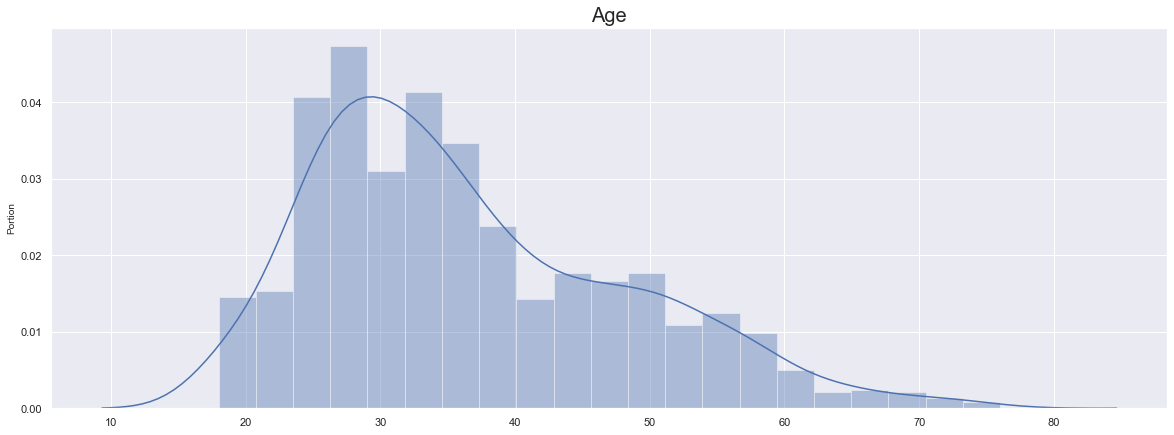

In [7]:
plt.figure(figsize=(20,7))

df_new = df['Age'].dropna().reset_index()['Age']
sns.set(color_codes=True)
age = []
for i in range(len(df_new)):
    if df_new[i] == '76 or older':
        age.append(76)
    else:
        age.append(int(df_new[i]))
        
ax = sns.distplot(age)
ax.set_title("Age",fontsize = 20)
ax.set_ylabel("Portion",fontsize = 10)

## College type

In [4]:
set(df['College type'])

{'2-year private (not-for-profit) school',
 '2-year public school',
 '4-year private (not-for-profit) school',
 '4-year public school',
 'Other',
 'Private for-profit or proprietary school (e.g. University of Phoenix, DeVry, etc.)',
 nan}

In [7]:
len(df['College type'].dropna())

644

In [8]:
df_ = df['College type'].dropna().reset_index()['College type']
dict_key = ['2-year public school','2-year private (not-for-profit) school',
             '4-year public school',
             '4-year private (not-for-profit) school',
             'Private for-profit or proprietary school (e.g. University of Phoenix, DeVry, etc.)','Other']

dic_ = {}
count = 0

for i in range(len(dict_key)):
    dic_[dict_key[i]] = [0,0]

for i in range(len(df_)):
    for j in range(len(dict_key)):
        if df_[i] == dict_key[j]:
            dic_[dict_key[j]][0] += 1
            count += 1
            pass   


    
for i in range(len(dict_key)):
    dic_[dict_key[i]][1] = "{:.2%}".format(dic_[dict_key[i]][0]/count)
dic_['Total'] = [count,"100.00%"] 
        
dic_df =  pd.DataFrame(dic_,index=['Frequency','Percentage']).T

dic_df

,Frequency,Percentage
2-year public school,211,18.99%
2-year private (not-for-profit) school,19,1.71%
4-year public school,607,54.64%
4-year private (not-for-profit) school,206,18.54%
"Private for-profit or proprietary school (e.g. University of Phoenix, DeVry, etc.)",32,2.88%
Other,36,3.24%
Total,1111,100.00%


In [13]:
df_ = df['College type'].dropna().reset_index()['College type']
dict_key = ['2 year', '4 year']

dic_ = {}
count = 0

for i in range(len(dict_key)):
    dic_[dict_key[i]] = [0,0]

for i in range(len(df_)):
    if df_[i] == '2-year public school' or df_[i] == '2-year private (not-for-profit) school':
        dic_['2 year'][0] += 1
    elif df_[i] == '4-year public school' or df_[i] == '4-year private (not-for-profit) school':
        dic_['4 year'][0] += 1
    


        
POSITION = list(dic_.keys())
NUM = list(dic_.values())
NUM = [i[0] for i in NUM]

PIE = Pie("", title_pos='center', width=900,title_text_size=20)
PIE.add("", POSITION, NUM,
        center=[63, 40],
 
        is_random= False,
        is_legend_show= False,
        is_label_show = True,
        
        
        legend_orient='vertical', legend_pos='left',
        label_text_size=15)

PIE.render('type of college.html')

In [15]:
df_ = df['College type'].dropna().reset_index()['College type']
dict_key = ['Public', 'Private','For Profit', 'Other']

dic_ = {}
count = 0

for i in range(len(dict_key)):
    dic_[dict_key[i]] = [0,0]

for i in range(len(df_)):
    if df_[i] == '2-year public school' or df_[i] == '4-year public school' :
        dic_['Public'][0] += 1
    elif df_[i] == '2-year private (not-for-profit) school' or df_[i] == '4-year private (not-for-profit) school':
        dic_['Private'][0] += 1
    elif df_[i] == 'Private for-profit or proprietary school (e.g. University of Phoenix, DeVry, etc.)':
        dic_['For Profit'][0] += 1
    else:
        dic_['Other'][0] += 1


        
POSITION = list(dic_.keys())
NUM = list(dic_.values())
NUM = [i[0] for i in NUM]

PIE = Pie("", title_pos='center', width=900,title_text_size=20)
PIE.add("", POSITION, NUM,
        center=[63, 50],

        is_random= False,
        is_legend_show= False,
        is_label_show = True,
        
        
        legend_orient='vertical', legend_pos='left',
        label_text_size=15)

PIE.render('type of college 2.html')

In [16]:
## Class rank

df_ = df['Class rank'].dropna().reset_index()['Class rank']
dict_key = ['Freshman','Sophomore', 'Junior', 'Senior','Graduate Student','Alumni','Unsure / Dont know','Not applicable']

dic_ = {}
count = 0

for i in range(len(dict_key)):
    dic_[dict_key[i]] = [0,0]

for i in range(len(df_)):
    if df_[i] == 'Unsure / Donäó»t know':
        dic_['Unsure / Dont know'][0] += 1
        count += 1
        pass
    for j in range(len(dict_key)):
        if df_[i] == dict_key[j]:
            dic_[dict_key[j]][0] += 1
            count += 1
            pass   

for i in range(len(dict_key)):
    dic_[dict_key[i]][1] = "{:.2%}".format(dic_[dict_key[i]][0]/count)
dic_['Total'] = [count,"100.00%"] 
        
dic_df =  pd.DataFrame(dic_,index=['Frequency','Percentage']).T

dic_df        


,Frequency,Percentage
Freshman,114,10.92%
Sophomore,171,16.38%
Junior,177,16.95%
Senior,277,26.53%
Graduate Student,262,25.10%
Alumni,8,0.77%
Unsure / Dont know,0,0.00%
Not applicable,35,3.35%
Total,1044,100.00%


In [17]:
df_ = df['Class rank'].dropna().reset_index()['Class rank']
dict_key = ['Undergraduate','Graduate']

dic_ = {}
count = 0

for i in range(len(dict_key)):
    dic_[dict_key[i]] = [0,0]

for i in range(len(df_)):
    if df_[i] == 'Unsure / Donäó»t know' or df_[i] == 'Alumni' or df_[i] == 'Not applicable':
        pass
    elif df_[i] == 'Graduate Student':
        dic_['Graduate'][0] += 1
    else:
        dic_['Undergraduate'][0] += 1
        
POSITION = list(dic_.keys())
NUM = list(dic_.values())
NUM = [i[0] for i in NUM]

PIE = Pie("", title_pos='center', width=900,title_text_size=20)
PIE.add("", POSITION, NUM,
        center=[63, 40],

        is_random= False,
        is_legend_show= False,
        is_label_show = True,
        
        
        legend_orient='vertical', legend_pos='left',
        label_text_size=15)

PIE.render('class rank.html')

In [17]:
## Transfer

df_ = df['Transfer'].dropna().reset_index()['Transfer']
dict_key = ['Yes','No']

dic_ = {}
count = 0

for i in range(len(dict_key)):
    dic_[dict_key[i]] = [0,0]

for i in range(len(df_)):
    for j in range(len(dict_key)):
        if df_[i] == dict_key[j]:
            dic_[dict_key[j]][0] += 1
            count += 1
            pass   

for i in range(len(dict_key)):
    dic_[dict_key[i]][1] = "{:.2%}".format(dic_[dict_key[i]][0]/count)
dic_['Total'] = [count,"100.00%"] 
        
dic_df =  pd.DataFrame(dic_,index=['Frequency','Percentage']).T

dic_df        


,Frequency,Percentage
Yes,295,63.30%
No,171,36.70%
Total,466,100.00%


In [27]:
df_ = df['GPA'].dropna().reset_index()['GPA']

df_.mode()

0    4.0
dtype: float64

In [20]:
#GPA

df_ = df['GPA'].dropna().reset_index()['GPA']

list_ = [round(df_.min(),2),round(df_.max(),2),round(df_.mean(),2),round(df_.median(),2),round(df_.mode()[0],2)]

dict_key = ['Minimum','Maximum','Mean','Median','Mode']


dic_ = {}
for i in range(len(list_)):
    dic_[dict_key[i]] = list_[i]


dic_df =  pd.DataFrame(dic_,index=['']).T

dic_df

,
Minimum,0.00
Maximum,4.90
Mean,3.38
Median,3.50
Mode,4.00


In [21]:
df_ = df[df['GPA']!=0]['GPA'].dropna().reset_index()['GPA']


list_ = [round(df_.min(),2),round(df_.max(),2),round(df_.mean(),2),round(df_.median(),2),round(df_.mode()[0],2)]

dict_key = ['Minimum','Maximum','Mean','Median','Mode']


dic_ = {}
for i in range(len(list_)):
    dic_[dict_key[i]] = list_[i]


dic_df =  pd.DataFrame(dic_,index=['']).T

dic_df

,
Minimum,1.00
Maximum,4.90
Mean,3.39
Median,3.50
Mode,4.00


In [22]:
df_ = df['GPA'].dropna().reset_index()['GPA']
dict_key = ['0.00-.99', "1.00-1.99",'2.00-2.99','3.00-3.99','4.00']

dic_ = {}
count = 0

for i in range(len(dict_key)):
    dic_[dict_key[i]] = [0,0]

for i in range(len(df_)):
    if df_[i] < 1:
        dic_['0.00-.99'][0] += 1
        count += 1
        pass
    elif df_[i] < 2:
        dic_['1.00-1.99'][0] += 1
        count += 1
    elif df_[i] < 3:
        dic_['2.00-2.99'][0] += 1
        count += 1
    elif df_[i] < 4:
        dic_['3.00-3.99'][0] += 1
        count += 1
    else:
        dic_['4.00'][0] += 1
        count += 1

POSITION = list(dic_.keys())
NUM = list(dic_.values())
NUM = [i[0] for i in NUM]

PIE = Pie("cumlative GPA", title_pos='center', width=900,title_text_size=20)
PIE.add("", POSITION, NUM,
        center=[50, 50],

        is_random= False,
        is_legend_show= False,
        is_label_show = True,
        
        
        legend_orient='vertical', legend_pos='left',
        label_text_size=15)

PIE.render('GPA 2.html')

for i in range(len(dict_key)):
    dic_[dict_key[i]][1] = "{:.2%}".format(dic_[dict_key[i]][0]/count)
dic_['Total'] = [count,"100.00%"] 
        
dic_df =  pd.DataFrame(dic_,index=['Frequency','Percentage']).T

dic_df   

,Frequency,Percentage
0.00-.99,1,0.15%
1.00-1.99,3,0.46%
2.00-2.99,115,17.61%
3.00-3.99,467,71.52%
4.00,67,10.26%
Total,653,100.00%


In [23]:
df_ = df[df['GPA']!=0]['GPA'].dropna().reset_index()['GPA']
dict_key = ['0.00-.99', "1.00-1.99",'2.00-2.99','3.00-3.99','4.00']

dic_ = {}
count = 0

for i in range(len(dict_key)):
    dic_[dict_key[i]] = [0,0]

for i in range(len(df_)):
    if df_[i] < 1:
        dic_['0.00-.99'][0] += 1
        count += 1
        pass
    elif df_[i] < 2:
        dic_['1.00-1.99'][0] += 1
        count += 1
    elif df_[i] < 3:
        dic_['2.00-2.99'][0] += 1
        count += 1
    elif df_[i] < 4:
        dic_['3.00-3.99'][0] += 1
        count += 1
    else:
        dic_['4.00'][0] += 1
        count += 1

POSITION = list(dic_.keys())
NUM = list(dic_.values())
NUM = [i[0] for i in NUM]

PIE = Pie("cumlative GPA", title_pos='center', width=900,title_text_size=20)
PIE.add("", POSITION, NUM,
        center=[50, 40],
        radius=[20,50],
        is_random= False,
        is_legend_show= False,
        is_label_show = True,
        
        
        legend_orient='vertical', legend_pos='left',
        label_text_size=15)

PIE.render('GPA 2.html')

for i in range(len(dict_key)):
    dic_[dict_key[i]][1] = "{:.2%}".format(dic_[dict_key[i]][0]/count)
dic_['Total'] = [count,"100.00%"] 
        
dic_df =  pd.DataFrame(dic_,index=['Frequency','Percentage']).T

dic_df   

,Frequency,Percentage
0.00-.99,0,0.00%
1.00-1.99,3,0.46%
2.00-2.99,115,17.64%
3.00-3.99,467,71.63%
4.00,67,10.28%
Total,652,100.00%


In [24]:
df_ = df['Academic credits#1_1_1'].dropna().reset_index()['Academic credits#1_1_1']

list_ = [round(df_.min(),2),round(df_.max(),2),round(df_.mean(),2),round(df_.median(),2),round(df_.mode()[0],2)]

dict_key = ['Minimum','Maximum','Mean','Median','Mode']


dic_ = {}
for i in range(len(list_)):
    dic_[dict_key[i]] = list_[i]


dic_df =  pd.DataFrame(dic_,index=['']).T

dic_df

,
Minimum,2.00
Maximum,193.00
Mean,13.53
Median,13.00
Mode,12.00


In [25]:
## degree
df_ = df['Degree'].dropna().reset_index()['Degree']
dict_key = [
    'Vocational certificate / On-the-Job Training',
    '2-year degree (AA / AS)',
 '4-year degree (BA / BS)',
 '5th year certification (Teaching, Counseling, etc.  )',
 'Doctorate (PhD / MD / JD / DVM)',
 'Graduate degree (MA / MS / MBA etc.  )',
 'Other']

dic_ = {}
count = 0

for i in range(len(dict_key)):
    dic_[dict_key[i]] = [0,0]

for i in range(len(df_)):
    for j in range(len(dict_key)):
        if df_[i] == dict_key[j]:
            dic_[dict_key[j]][0] += 1
            count += 1
            pass   

for i in range(len(dict_key)):
    dic_[dict_key[i]][1] = "{:.2%}".format(dic_[dict_key[i]][0]/count)
dic_['Total'] = [count,"100.00%"] 
        
dic_df =  pd.DataFrame(dic_,index=['Frequency','Percentage']).T

dic_df        

,Frequency,Percentage
Vocational certificate / On-the-Job Training,9,0.82%
2-year degree (AA / AS),177,16.05%
4-year degree (BA / BS),607,55.03%
"5th year certification (Teaching, Counseling, etc. )",10,0.91%
Doctorate (PhD / MD / JD / DVM),84,7.62%
Graduate degree (MA / MS / MBA etc. ),198,17.95%
Other,18,1.63%
Total,1103,100.00%


In [26]:
## degree
df_ = df['Motivation'].dropna().reset_index()['Motivation']
dict_key = [
   'Be more competitive in the job market',
 'Change of career',
 'Earn a certification / degree',
 'Job promotion',
 'Keep knowledge and skills fresh',
 'Learn skills for job',
 'Personal enrichment',
 'Preparation for the civilian job market',
 'Strengthen my resume',
 'Using VA education benefits to supplement income',
 'Was unprepared for employment after transitioning from the military',
 'Other']

dic_ = {}
count = 0

for i in range(len(dict_key)):
    dic_[dict_key[i]] = [0,0]

for i in range(len(df_)):
    for j in range(len(dict_key)):
        if df_[i] == dict_key[j]:
            dic_[dict_key[j]][0] += 1
            count += 1
            pass   

for i in range(len(dict_key)):
    dic_[dict_key[i]][1] = "{:.2%}".format(dic_[dict_key[i]][0]/count)
dic_['Total'] = [count,"100.00%"] 
        
dic_df =  pd.DataFrame(dic_,index=['Frequency','Percentage']).T

dic_df        

,Frequency,Percentage
Be more competitive in the job market,200,18.15%
Change of career,273,24.77%
Earn a certification / degree,211,19.15%
Job promotion,28,2.54%
Keep knowledge and skills fresh,10,0.91%
Learn skills for job,56,5.08%
Personal enrichment,103,9.35%
Preparation for the civilian job market,78,7.08%
Strengthen my resume,18,1.63%
Using VA education benefits to supplement income,33,2.99%


In [27]:
## degree
df_ = df['Major vs MOS'].dropna().reset_index()['Major vs MOS']
dict_key = [
    'Not similar at all',
   'A little similar',
     'Somewhat similar',
     'Very similar',
 'Exactly the same']

dic_ = {}
count = 0

for i in range(len(dict_key)):
    dic_[dict_key[i]] = [0,0]

for i in range(len(df_)):
    for j in range(len(dict_key)):
        if df_[i] == dict_key[j]:
            dic_[dict_key[j]][0] += 1
            count += 1
            pass   

for i in range(len(dict_key)):
    dic_[dict_key[i]][1] = "{:.2%}".format(dic_[dict_key[i]][0]/count)
dic_['Total'] = [count,"100.00%"] 
        
dic_df =  pd.DataFrame(dic_,index=['Frequency','Percentage']).T

dic_df        

,Frequency,Percentage
Not similar at all,660,62.86%
A little similar,166,15.81%
Somewhat similar,127,12.10%
Very similar,78,7.43%
Exactly the same,19,1.81%
Total,1050,100.00%


In [4]:
set(df['FAFSA'].dropna().reset_index()['FAFSA'])

{'Have completed but not yet submitted a FAFSA',
 'No, and do not plan on submitting a FAFSA',
 'Unsure / Donäó»t know',
 "What's a FAFSA?",
 'Yes, completed and submitted'}

In [28]:
## FAFSA
df_ = df['FAFSA'].dropna().reset_index()['FAFSA']
dict_key = [
     'Yes, completed and submitted',
   'Have completed but not yet submitted a FAFSA',
 'No, and do not plan on submitting a FAFSA',
 "What's a FAFSA?",
    'Unsure / Dont know'
]

dic_ = {}
count = 0

for i in range(len(dict_key)):
    dic_[dict_key[i]] = [0,0]

for i in range(len(df_)):
    if df_[i] == 'Unsure / Donäó»t know':
        dic_['Unsure / Dont know'][0] += 1
        count+=1
        pass
        
    for j in range(len(dict_key)):
        if df_[i] == dict_key[j]:
            dic_[dict_key[j]][0] += 1
            count += 1
            pass   

for i in range(len(dict_key)):
    dic_[dict_key[i]][1] = "{:.2%}".format(dic_[dict_key[i]][0]/count)
dic_['Total'] = [count,"100.00%"] 
        
dic_df =  pd.DataFrame(dic_,index=['Frequency','Percentage']).T

dic_df    

,Frequency,Percentage
"Yes, completed and submitted",766,71.99%
Have completed but not yet submitted a FAFSA,38,3.57%
"No, and do not plan on submitting a FAFSA",245,23.03%
What's a FAFSA?,15,1.41%
Unsure / Dont know,0,0.00%
Total,1064,100.00%


In [29]:
## Fin aid
df_ = df['Fin aid'].dropna().reset_index()['Fin aid']
dict_key = [
     'Employer benefits / reimbursement','GI Bill (any version / chapter)','Tuition Assistance (TA)',
    'Vocational Rehabilitation and Employment (Voc Rehab)','Yellow Ribbon Program','Hazelwood Act Provision',
    'Federal Pell grant','Private grant','School grant','Out of my own pocket','Personal savings',
    'Federal student loans','Private student loans','Private scholarships','ROTC scholarship','School scholarship',
    'SVA-Partner scholarship', 'State tuition waiver for active duty service members, reservists/national guard, veterans',
    'State tuition waiver for low-income students','Parental contributions','Other familial support','Other']


dic_ = {}
count = 0

for i in range(len(dict_key)):
    dic_[dict_key[i]] = [0,0]

for i in range(len(df_)):      
    for j in range(len(dict_key)):
        if dict_key[j] in df_[i]:
            dic_[dict_key[j]][0] += 1
            count += 1
              

for i in range(len(dict_key)):
    dic_[dict_key[i]][1] = "{:.2%}".format(dic_[dict_key[i]][0]/count)
dic_['Total'] = [count,"100.00%"] 
        
dic_df =  pd.DataFrame(dic_,index=['Frequency','Percentage']).T

dic_df    

,Frequency,Percentage
Employer benefits / reimbursement,56,2.17%
GI Bill (any version / chapter),754,29.24%
Tuition Assistance (TA),62,2.40%
Vocational Rehabilitation and Employment (Voc Rehab),169,6.55%
Yellow Ribbon Program,81,3.14%
Hazelwood Act Provision,8,0.31%
Federal Pell grant,303,11.75%
Private grant,21,0.81%
School grant,125,4.85%
Out of my own pocket,238,9.23%


In [30]:
## GI Bill unused

df_ = df['GI Bill unused'].dropna().reset_index()['GI Bill unused']
dict_key = [
    'Did not pay into training funds during active duty (Montgomery GI Bill only)',
    'Do not believe I am entitled to or eligible for VA education or training benefits',
    'Do not know how to apply for education or training benefits',
    'Do not need any additional education or training',
    'Do not need or want assistance from VA',
    'I am using state education benefits from the National Guard instead',
    'have already used all my months of eligibility',
    'My period of eligibility expired',
    'Never considered getting any education or training from VA',
    'Not aware of VA education or training benefits',
    'Saving GI Bill for later',
    'Too much trouble or red tape',
    'Transferred eligibility to dependent',
    'Using Title IV / Department of Education / FAFSA funds instead',
    'Other'
]


dic_ = {}
count = 0

for i in range(len(dict_key)):
    dic_[dict_key[i]] = [0,0]

for i in range(len(df_)):      
    for j in range(len(dict_key)):
        if dict_key[j] in df_[i]:
            dic_[dict_key[j]][0] += 1
            count += 1
              

for i in range(len(dict_key)):
    dic_[dict_key[i]][1] = "{:.2%}".format(dic_[dict_key[i]][0]/count)
dic_['Total'] = [count,"100.00%"] 
        
dic_df =  pd.DataFrame(dic_,index=['Frequency','Percentage']).T

dic_df 

,Frequency,Percentage
Did not pay into training funds during active duty (Montgomery GI Bill only),9,3.75%
Do not believe I am entitled to or eligible for VA education or training benefits,24,10.00%
Do not know how to apply for education or training benefits,2,0.83%
Do not need any additional education or training,1,0.42%
Do not need or want assistance from VA,3,1.25%
I am using state education benefits from the National Guard instead,3,1.25%
have already used all my months of eligibility,76,31.67%
My period of eligibility expired,31,12.92%
Never considered getting any education or training from VA,3,1.25%
Not aware of VA education or training benefits,2,0.83%


In [32]:
## 
df_ = df['GI Bill current'].dropna().reset_index()['GI Bill current']
dict_key = [
 'CHAPTER 30: Montgomery GI Bill-Active Duty (MGIB-AD)',
 'CHAPTER 31: Vocational Rehabilitation',
 'CHAPTER 33: Post-9/11 GI Bill',
 'CHAPTER 35: Survivors and Dependents Educational Assistance Program (DEA)',
  'CHAPTER 1606: Montgomery GI Bill-Selected Reserve (MGIB-SR)',
 'Other',
 'Unsure / Don\'t know'
]

dic_ = {}
count = 0

for i in range(len(dict_key)):
    dic_[dict_key[i]] = [0,0]

for i in range(len(df_)):
    if df_[i] == 'Unsure / Donäó»t know':
        dic_['Unsure / Don\'t know'][0] += 1
        count+=1
        pass
        
    for j in range(len(dict_key)):
        if df_[i] == dict_key[j]:
            dic_[dict_key[j]][0] += 1
            count += 1
            pass   

for i in range(len(dict_key)):
    dic_[dict_key[i]][1] = "{:.2%}".format(dic_[dict_key[i]][0]/count)
dic_['Total'] = [count,"100.00%"] 
        
dic_df =  pd.DataFrame(dic_,index=['Frequency','Percentage']).T

dic_df 

,Frequency,Percentage
CHAPTER 30: Montgomery GI Bill-Active Duty (MGIB-AD),27,3.05%
CHAPTER 31: Vocational Rehabilitation,174,19.64%
CHAPTER 33: Post-9/11 GI Bill,640,72.23%
CHAPTER 35: Survivors and Dependents Educational Assistance Program (DEA),19,2.14%
CHAPTER 1606: Montgomery GI Bill-Selected Reserve (MGIB-SR),23,2.60%
Other,3,0.34%
Unsure / Don't know,0,0.00%
Total,886,100.00%


In [33]:

df_ = df['GI Bill eligibility'].dropna().reset_index()['GI Bill eligibility']
dict_key = ['0%','10%','20%','30%','40%','50%','60%','70%','80%','90%','100%']

dic_ = {}
count = 0

for i in range(len(dict_key)):
    dic_[dict_key[i]] = [0,0]

for i in range(len(df_)):     
    for j in range(len(dict_key)):
        if df_[i] == dict_key[j]:
            dic_[dict_key[j]][0] += 1
            count += 1
            pass   

for i in range(len(dict_key)):
    dic_[dict_key[i]][1] = "{:.2%}".format(dic_[dict_key[i]][0]/count)
dic_['Total'] = [count,"100.00%"] 
        
dic_df =  pd.DataFrame(dic_,index=['Frequency','Percentage']).T

dic_df 

,Frequency,Percentage
0%,0,0.00%
10%,0,0.00%
20%,1,0.16%
30%,0,0.00%
40%,6,0.95%
50%,26,4.12%
60%,18,2.85%
70%,11,1.74%
80%,8,1.27%
90%,17,2.69%


In [34]:

df_ = df['GI Bill previous'].dropna().reset_index()['GI Bill previous']
dict_key = ['Yes','No',"Unsure / Don't know"]

dic_ = {}
count = 0

for i in range(len(dict_key)):
    dic_[dict_key[i]] = [0,0]

for i in range(len(df_)):     
    for j in range(len(dict_key)):
        if df_[i] == dict_key[j]:
            dic_[dict_key[j]][0] += 1
            count += 1
            pass   

for i in range(len(dict_key)):
    dic_[dict_key[i]][1] = "{:.2%}".format(dic_[dict_key[i]][0]/count)
dic_['Total'] = [count,"100.00%"] 
        
dic_df =  pd.DataFrame(dic_,index=['Frequency','Percentage']).T

dic_df 

,Frequency,Percentage
Yes,80,12.74%
No,535,85.19%
Unsure / Don't know,13,2.07%
Total,628,100.00%


In [24]:
set(df['GI Bill past version'].dropna().reset_index()['GI Bill past version'])

{'CHAPTER 1606: Montgomery GI Bill-Selected Reserve (MGIB-SR)',
 'CHAPTER 1606: Montgomery GI Bill-Selected Reserve (MGIB-SR),CHAPTER 1607: Reserve Educational Assistance Program (REAP)',
 'CHAPTER 30: Montgomery GI Bill-Active Duty (MGIB)',
 'CHAPTER 30: Montgomery GI Bill-Active Duty (MGIB),CHAPTER 1606: Montgomery GI Bill-Selected Reserve (MGIB-SR)',
 'CHAPTER 30: Montgomery GI Bill-Active Duty (MGIB),CHAPTER 32: Veterans Educational Assistance Program (VEAP),CHAPTER 33: Post-9/11 GI Bill',
 'CHAPTER 30: Montgomery GI Bill-Active Duty (MGIB),CHAPTER 33: Post-9/11 GI Bill',
 'CHAPTER 30: Montgomery GI Bill-Active Duty (MGIB),CHAPTER 33: Post-9/11 GI Bill,CHAPTER 1606: Montgomery GI Bill-Selected Reserve (MGIB-SR)',
 'CHAPTER 31: Vocational Rehabilitation',
 'CHAPTER 31: Vocational Rehabilitation,CHAPTER 1606: Montgomery GI Bill-Selected Reserve (MGIB-SR)',
 'CHAPTER 33: Post-9/11 GI Bill',
 'CHAPTER 33: Post-9/11 GI Bill,CHAPTER 1606: Montgomery GI Bill-Selected Reserve (MGIB-SR)'}

In [35]:
df_ = df['GI Bill past version'].dropna().reset_index()['GI Bill past version']
dict_key = [
    'CHAPTER 30: Montgomery GI Bill-Active Duty (MGIB-AD)',
    'CHAPTER 31: Vocational Rehabilitation',
    'CHAPTER 32: Veterans Educational Assistance Program (VEAP)',
    'CHAPTER 33: Post-9/11 GI Bill',
    'CHAPTER 35: Survivors and Dependents Educational Assistance Program (DEA)',
    'CHAPTER 1606: Montgomery GI Bill-Selected Reserve (MGIB-SR)',
    'CHAPTER 1607: Reserve Educational Assistance Program (REAP)',
    'Other',
    'Unsure / Don\'t know'
    ]

dic_ = {}
count = 0

for i in range(len(dict_key)):
    dic_[dict_key[i]] = [0,0]

for i in range(len(df_)):      
    for j in range(len(dict_key)):
        if dict_key[j] in df_[i]:
            dic_[dict_key[j]][0] += 1
            count += 1
              

for i in range(len(dict_key)):
    dic_[dict_key[i]][1] = "{:.2%}".format(dic_[dict_key[i]][0]/count)
dic_['Total'] = [count,"100.00%"] 
        
dic_df =  pd.DataFrame(dic_,index=['Frequency','Percentage']).T

dic_df

,Frequency,Percentage
CHAPTER 30: Montgomery GI Bill-Active Duty (MGIB-AD),0,0.00%
CHAPTER 31: Vocational Rehabilitation,9,19.57%
CHAPTER 32: Veterans Educational Assistance Program (VEAP),1,2.17%
CHAPTER 33: Post-9/11 GI Bill,9,19.57%
CHAPTER 35: Survivors and Dependents Educational Assistance Program (DEA),3,6.52%
CHAPTER 1606: Montgomery GI Bill-Selected Reserve (MGIB-SR),17,36.96%
CHAPTER 1607: Reserve Educational Assistance Program (REAP),5,10.87%
Other,2,4.35%
Unsure / Don't know,0,0.00%
Total,46,100.00%


In [36]:

df_ = df['Military orders'].dropna().reset_index()['Military orders']
dict_key = ['Yes','No',"Unsure / Don't know"]

dic_ = {}
count = 0

for i in range(len(dict_key)):
    dic_[dict_key[i]] = [0,0]

for i in range(len(df_)):     
    for j in range(len(dict_key)):
        if df_[i] == dict_key[j]:
            dic_[dict_key[j]][0] += 1
            count += 1
            pass   

for i in range(len(dict_key)):
    dic_[dict_key[i]][1] = "{:.2%}".format(dic_[dict_key[i]][0]/count)
dic_['Total'] = [count,"100.00%"] 
        
dic_df =  pd.DataFrame(dic_,index=['Frequency','Percentage']).T

dic_df 

,Frequency,Percentage
Yes,152,18.56%
No,656,80.10%
Unsure / Don't know,11,1.34%
Total,819,100.00%


In [38]:

df_ = df['Withdraw rank'].dropna().reset_index()['Withdraw rank']
dict_key = ["Undergraduate",'Graduate']

dic_ = {}
count = 0

for i in range(len(dict_key)):
    dic_[dict_key[i]] = [0,0]

for i in range(len(df_)):     
    if df_[i] == 'Graduate student':
        dic_['Graduate'][0] += 1
        count += 1
    else:
        dic_["Undergraduate"][0] += 1
        count += 1
        
        
        
POSITION = list(dic_.keys())
NUM = list(dic_.values())
NUM = [i[0] for i in NUM]

PIE = Pie("", title_pos='center', width=900,title_text_size=20)
PIE.add("", POSITION, NUM,
        center=[50, 40],

        is_random= False,
        is_legend_show= False,
        is_label_show = True,
        
        
        legend_orient='vertical', legend_pos='left',
        label_text_size=15)

PIE.render('withdraw.html')

for i in range(len(dict_key)):
    dic_[dict_key[i]][1] = "{:.2%}".format(dic_[dict_key[i]][0]/count)
dic_['Total'] = [count,"100.00%"] 
        
dic_df =  pd.DataFrame(dic_,index=['Frequency','Percentage']).T

dic_df 

,Frequency,Percentage
Undergraduate,38,57.58%
Graduate,28,42.42%
Total,66,100.00%


In [39]:
df_ = df['Withdraw rank'].dropna().reset_index()['Withdraw rank']
dict_key = ['Freshman','Sophomore', 'Junior', 'Senior', 'Graduate']

dic_ = {}
count = 0

for i in range(len(dict_key)):
    dic_[dict_key[i]] = [0,0]

for i in range(len(df_)):     
    for j in range(len(dict_key)):
        if dict_key[j] in df_[i]:
            dic_[dict_key[j]][0] += 1
            count += 1
              
        
POSITION = list(dic_.keys())
NUM = list(dic_.values())
NUM = [i[0] for i in NUM]

PIE = Pie("", title_pos='center', width=900,title_text_size=20)
PIE.add("", POSITION, NUM,
        center=[50, 40],

        is_random= False,
        is_legend_show= False,
        is_label_show = True,
        
        
        legend_orient='vertical', legend_pos='left',
        label_text_size=15)

PIE.render('withdraw.html')

for i in range(len(dict_key)):
    dic_[dict_key[i]][1] = "{:.2%}".format(dic_[dict_key[i]][0]/count)
dic_['Total'] = [count,"100.00%"] 
        
dic_df =  pd.DataFrame(dic_,index=['Frequency','Percentage']).T

dic_df 

,Frequency,Percentage
Freshman,4,6.06%
Sophomore,10,15.15%
Junior,9,13.64%
Senior,15,22.73%
Graduate,28,42.42%
Total,66,100.00%


In [ ]:
df_ = df['Withdraw reasons'].dropna().reset_index()['Withdraw reasons']
dict_key = ["Undergraduate",'Graduate']

dic_ = {}
count = 0

for i in range(len(dict_key)):
    dic_[dict_key[i]] = [0,0]

for i in range(len(df_)):     
    if df_[i] == 'Graduate student':
        dic_['Graduate'][0] += 1
        count += 1
    else:
        dic_["Undergraduate"][0] += 1
        count += 1
        
        
        
POSITION = list(dic_.keys())
NUM = list(dic_.values())
NUM = [i[0] for i in NUM]

PIE = Pie("", title_pos='center', width=900,title_text_size=20)
PIE.add("", POSITION, NUM,
        center=[50, 40],
        radius=[20,50],
        is_random= False,
        is_legend_show= False,
        is_label_show = True,
        
        
        legend_orient='vertical', legend_pos='left',
        label_text_size=15)

PIE.render('withdraw.html')

for i in range(len(dict_key)):
    dic_[dict_key[i]][1] = "{:.2%}".format(dic_[dict_key[i]][0]/count)
dic_['Total'] = [count,"100.00%"] 
        
dic_df =  pd.DataFrame(dic_,index=['Frequency','Percentage']).T

dic_df 

In [40]:
df_ = df['Withdraw reasons'].dropna().reset_index()['Withdraw reasons']
dict_key = [
    'Achieved my academic goal', 'Currently on academic probation','Currently on disciplinary probation','Delay in receiving GI Bill benefits',
    'Difficulty adjusting to school','Earning a degree became less of a priority','Enrolled in classes for enrichment only',
    'Family obligations','Financial reasons','Found employment prior to completing program','Getting a degree / certificate was never my academic goal',
    'Lack of support from family','Lack of support from friends','Lack of support from school','Lack of support from service members',
    'Low academic performance','Military activation and/or deployment','Needed a break from school','Related to health issue/injury acquired after military',
    'Related to service-connected disability','School closed, applying/transferring to a new school','School closed, NOT applying/transferring to a new school',
    'School was too stressful','Transportation difficulties','Was not accepted into a school or academic program','Other'

    ]

dic_ = {}
count = 0

for i in range(len(dict_key)):
    dic_[dict_key[i]] = [0,0]

for i in range(len(df_)):      
    for j in range(len(dict_key)):
        if dict_key[j] in df_[i]:
            dic_[dict_key[j]][0] += 1
            count += 1
              

for i in range(len(dict_key)):
    dic_[dict_key[i]][1] = "{:.2%}".format(dic_[dict_key[i]][0]/count)
dic_['Total'] = [count,"100.00%"] 
        
dic_df =  pd.DataFrame(dic_,index=['Frequency','Percentage']).T

dic_df

,Frequency,Percentage
Achieved my academic goal,11,6.67%
Currently on academic probation,4,2.42%
Currently on disciplinary probation,0,0.00%
Delay in receiving GI Bill benefits,5,3.03%
Difficulty adjusting to school,6,3.64%
Earning a degree became less of a priority,8,4.85%
Enrolled in classes for enrichment only,4,2.42%
Family obligations,15,9.09%
Financial reasons,24,14.55%
Found employment prior to completing program,8,4.85%


In [5]:
set(df['Return likelihood'].dropna().reset_index()['Return likelihood'])

{'Extremely likely',
 'Extremely unlikely',
 'Likely',
 'Unlikely',
 'Unsure / Donäó»t know',
 'Very likely',
 'Very unlikely'}

In [41]:

df_ = df['Return likelihood'].dropna().reset_index()['Return likelihood']
dict_key = ['Extremely unlikely','Very unlikely','Unlikely','Likely','Very likely','Extremely likely','Unsure / Don\'t know']

dic_ = {}
count = 0

for i in range(len(dict_key)):
    dic_[dict_key[i]] = [0,0]

for i in range(len(df_)):  
    if df_[i] == 'Unsure / Donäó»t know':
            dic_['Unsure / Don\'t know'][0] += 1
            count += 1        
    for j in range(len(dict_key)):
        if df_[i] == dict_key[j]:
            dic_[dict_key[j]][0] += 1
            count += 1
            pass   

for i in range(len(dict_key)):
    dic_[dict_key[i]][1] = "{:.2%}".format(dic_[dict_key[i]][0]/count)
dic_['Total'] = [count,"100.00%"] 
        
dic_df =  pd.DataFrame(dic_,index=['Frequency','Percentage']).T

dic_df

,Frequency,Percentage
Extremely unlikely,4,6.78%
Very unlikely,1,1.69%
Unlikely,7,11.86%
Likely,16,27.12%
Very likely,9,15.25%
Extremely likely,22,37.29%
Unsure / Don't know,0,0.00%
Total,59,100.00%


In [7]:
set(df['Previous degree_2'].dropna().reset_index()['Previous degree_2'])

{'No', "Unsure / Don't know", 'Yes'}

In [46]:

df_ = df['Previous degree_4'].dropna().reset_index()['Previous degree_4']
dict_key = [ 'Yes','No', "Unsure / Don't know"]

dic_ = {}
count = 0

for i in range(len(dict_key)):
    dic_[dict_key[i]] = [0,0]

for i in range(len(df_)):  
       
    for j in range(len(dict_key)):
        if df_[i] == dict_key[j]:
            dic_[dict_key[j]][0] += 1
            count += 1
            pass   

for i in range(len(dict_key)):
    dic_[dict_key[i]][1] = "{:.2%}".format(dic_[dict_key[i]][0]/count)
dic_['Total'] = [count,"100.00%"] 
        
dic_df =  pd.DataFrame(dic_,index=['Frequency','Percentage']).T

dic_df

,Frequency,Percentage
Yes,30,5.06%
No,560,94.44%
Unsure / Don't know,3,0.51%
Total,593,100.00%


In [11]:
set(df['Degree earned'].dropna().reset_index()['Degree earned'])

{'2-year degree or certificate (AA / AS)',
 '4-year degree (BA / BS)',
 '5th year certification (Teaching, Counseling, etc.)',
 'Doctorate (PhD / MD / JD / DVM)',
 'Graduate degree (MA / MS / MBA etc.)',
 'Other'}

In [47]:
df_ = df['Degree earned'].dropna().reset_index()['Degree earned']
dict_key = ['2-year degree or certificate (AA / AS)',
 '4-year degree (BA / BS)',
 '5th year certification (Teaching, Counseling, etc.)',
             'Graduate degree (MA / MS / MBA etc.)',
 'Doctorate (PhD / MD / JD / DVM)',
 'Other']

dic_ = {}
count = 0

for i in range(len(dict_key)):
    dic_[dict_key[i]] = [0,0]

for i in range(len(df_)):  
       
    for j in range(len(dict_key)):
        if df_[i] == dict_key[j]:
            dic_[dict_key[j]][0] += 1
            count += 1
            pass   

for i in range(len(dict_key)):
    dic_[dict_key[i]][1] = "{:.2%}".format(dic_[dict_key[i]][0]/count)
dic_['Total'] = [count,"100.00%"] 
        
dic_df =  pd.DataFrame(dic_,index=['Frequency','Percentage']).T

dic_df

,Frequency,Percentage
2-year degree or certificate (AA / AS),12,6.09%
4-year degree (BA / BS),100,50.76%
"5th year certification (Teaching, Counseling, etc.)",1,0.51%
Graduate degree (MA / MS / MBA etc.),71,36.04%
Doctorate (PhD / MD / JD / DVM),11,5.58%
Other,2,1.02%
Total,197,100.00%


In [52]:
df_ = df['Grad year'].dropna().reset_index()['Grad year']
dict_key = ["Before 1990"]

year = 1991
for i in range(29):
    dict_key.append(str(year))
    year+=1
dic_ = {}
count = 0

for i in range(len(dict_key)):
    dic_[dict_key[i]] = [0,0]

for i in range(len(df_)):  
    if df_[i] <= 1990:
        dic_["Before 1990"][0] += 1
        count += 1
        pass
    for j in range(1,len(dict_key)):
        if df_[i] == int(dict_key[j]):
            dic_[dict_key[j]][0] += 1
            count += 1
            pass   

for i in range(len(dict_key)):
    dic_[dict_key[i]][1] = "{:.2%}".format(dic_[dict_key[i]][0]/count)
dic_['Total'] = [count,"100.00%"] 
        
dic_df =  pd.DataFrame(dic_,index=['Frequency','Percentage']).T

dic_df

,Frequency,Percentage
Before 1990,14,7.25%
1991,0,0.00%
1992,0,0.00%
1993,0,0.00%
1994,0,0.00%
1995,2,1.04%
1996,2,1.04%
1997,3,1.55%
1998,1,0.52%
1999,3,1.55%


In [26]:
set(df['Parental education_1'].dropna().reset_index()['Parental education_1'])

{'2-year degree or certificate (AA / AS)',
 '4-year degree (BA / BS)',
 '5th year certification (Teaching, Counseling, etc.)',
 'Doctorate (PhD / MD / JD / DVM)',
 'Elementary school',
 'Graduate degree (MA / MS / MBA, etc.)',
 'High school',
 'Junior high school',
 'Prefer not to say',
 'Some college',
 "Unsure / Don't know"}

In [51]:
df_ = df['Parental education_3'].dropna().reset_index()['Parental education_3']
dict_key = [
    'Elementary school',
    'Junior high school',
    'High school',
    'Some college',
    '2-year degree or certificate (AA / AS)',
    '4-year degree (BA / BS)',
    '5th year certification (Teaching, Counseling, etc.)',
    'Graduate degree (MA / MS / MBA etc.)',
    'Doctorate (PhD / MD / JD / DVM)',
    "Unsure / Don't know",
    'Prefer not to say',
    'Other'
]

dic_ = {}
count = 0

for i in range(len(dict_key)):
    dic_[dict_key[i]] = [0,0]

for i in range(len(df_)):  
       
    for j in range(len(dict_key)):
        if df_[i] == dict_key[j]:
            dic_[dict_key[j]][0] += 1
            count += 1
            pass   

for i in range(len(dict_key)):
    dic_[dict_key[i]][1] = "{:.2%}".format(dic_[dict_key[i]][0]/count)
dic_['Total'] = [count,"100.00%"] 
        
dic_df =  pd.DataFrame(dic_,index=['Frequency','Percentage']).T

dic_df

,Frequency,Percentage
Elementary school,1,0.12%
Junior high school,0,0.00%
High school,0,0.00%
Some college,7,0.82%
2-year degree or certificate (AA / AS),77,9.06%
4-year degree (BA / BS),462,54.35%
"5th year certification (Teaching, Counseling, etc.)",16,1.88%
Graduate degree (MA / MS / MBA etc.),0,0.00%
Doctorate (PhD / MD / JD / DVM),260,30.59%
Unsure / Don't know,22,2.59%


In [53]:
df_ = df['Grad employment'].dropna().reset_index()['Grad employment']
dict_key = [
        'Was employed full-time at time of graduation',
    '1 month',
    '2 months',
    '3 months',
    '4 months',
    '5 months',
    '6 months',
    '7 months',
    '8 months',
    '9 months',
    '10 months',
    '11 months',
    '12 months',
    'Over a year',

    ]

dic_ = {}
count = 0

for i in range(len(dict_key)):
    dic_[dict_key[i]] = [0,0]

for i in range(len(df_)):  
       
    for j in range(len(dict_key)):
        if df_[i] == dict_key[j]:
            dic_[dict_key[j]][0] += 1
            count += 1
            pass   

for i in range(len(dict_key)):
    dic_[dict_key[i]][1] = "{:.2%}".format(dic_[dict_key[i]][0]/count)
dic_['Total'] = [count,"100.00%"] 
        
dic_df =  pd.DataFrame(dic_,index=['Frequency','Percentage']).T

dic_df

,Frequency,Percentage
Was employed full-time at time of graduation,104,53.33%
1 month,23,11.79%
2 months,12,6.15%
3 months,10,5.13%
4 months,5,2.56%
5 months,7,3.59%
6 months,8,4.10%
7 months,2,1.03%
8 months,2,1.03%
9 months,2,1.03%


In [38]:
set(df['Debt total'].dropna().reset_index()['Debt total'])

{'$1 to $9,999',
 '$10,000 to $19,999',
 '$100,000 to $109,999',
 '$120,000 to $129,999',
 '$130,000 to $139,999',
 '$150,000 and above',
 '$20,000 to $29,999',
 '$30,000 to $39,999',
 '$40,000 to $49,999',
 '$50,000 to $59,999',
 '$60,000 to $69,999',
 '$70,000 to $79,999',
 '$80,000 to $89,999',
 '$90,000 to $99,999',
 'None, $0',
 'Prefer not to state'}

In [54]:
df_ = df['Debt total'].dropna().reset_index()['Debt total']
dict_key = [
    'None, $0',
    '$1 to $9,999',
    '$10,000 to $19,999',
    '$20,000 to $29,999',
    '$30,000 to $39,999',
    '$40,000 to $49,999',
    '$50,000 to $59,999',
    '$60,000 to $69,999',
    '$70,000 to $79,999',
    '$80,000 to $89,999',
    '$90,000 to $99,999',
    '$100,000 to $109,999',
    '$110,000 to $119,999',
    '$120,000 to $129,999',
    '$130,000 to $139,999',
    '$150,000 and above',
    'Prefer not to state'

    ]

dic_ = {}
count = 0

for i in range(len(dict_key)):
    dic_[dict_key[i]] = [0,0]

for i in range(len(df_)):  
       
    for j in range(len(dict_key)):
        if df_[i] == dict_key[j]:
            dic_[dict_key[j]][0] += 1
            count += 1
            pass   

for i in range(len(dict_key)):
    dic_[dict_key[i]][1] = "{:.2%}".format(dic_[dict_key[i]][0]/count)
dic_['Total'] = [count,"100.00%"] 
        
dic_df =  pd.DataFrame(dic_,index=['Frequency','Percentage']).T

dic_df

,Frequency,Percentage
"None, $0",105,40.23%
"$1 to $9,999",36,13.79%
"$10,000 to $19,999",22,8.43%
"$20,000 to $29,999",24,9.20%
"$30,000 to $39,999",15,5.75%
"$40,000 to $49,999",12,4.60%
"$50,000 to $59,999",16,6.13%
"$60,000 to $69,999",4,1.53%
"$70,000 to $79,999",4,1.53%
"$80,000 to $89,999",5,1.92%


In [57]:
df_ = df['Debt payments_3'].dropna().reset_index()['Debt payments_3']
dict_key = [
    'Yes','No',"Unsure / Don't know", 'Decline to state'
    ]

dic_ = {}
count = 0

for i in range(len(dict_key)):
    dic_[dict_key[i]] = [0,0]

for i in range(len(df_)):
    if df_[i] == 'Unsure / Don\x89Ûªt Know':
        dic_["Unsure / Don't know"][0] += 1
        count += 1
        pass
       
    for j in range(len(dict_key)):
        if df_[i] == dict_key[j]:
            dic_[dict_key[j]][0] += 1
            count += 1
            pass   

for i in range(len(dict_key)):
    dic_[dict_key[i]][1] = "{:.2%}".format(dic_[dict_key[i]][0]/count)
dic_['Total'] = [count,"100.00%"] 
        
dic_df =  pd.DataFrame(dic_,index=['Frequency','Percentage']).T

dic_df

,Frequency,Percentage
Yes,35,24.14%
No,110,75.86%
Unsure / Don't know,0,0.00%
Decline to state,0,0.00%
Total,145,100.00%


In [49]:
set(df['Debt default'].dropna().reset_index()['Debt default'])

{'No, but have been in default in the past',
 'No, never been in default',
 'Prefer not to say',
 'Unsure / Don\x89Ûªt know',
 'Yes, currently in default'}

In [58]:
df_ = df['Debt default'].dropna().reset_index()['Debt default']
dict_key = [
    'Yes, currently in default','No, but have been in default in the past','No, never been in default',
    "Unsure / Don't know", 'Decline to state'
    ]

dic_ = {}
count = 0

for i in range(len(dict_key)):
    dic_[dict_key[i]] = [0,0]

for i in range(len(df_)):
    if df_[i] == 'Unsure / Don\x89Ûªt Know':
        dic_["Unsure / Don't know"][0] += 1
        count += 1
        pass
       
    for j in range(len(dict_key)):
        if df_[i] == dict_key[j]:
            dic_[dict_key[j]][0] += 1
            count += 1
            pass   

for i in range(len(dict_key)):
    dic_[dict_key[i]][1] = "{:.2%}".format(dic_[dict_key[i]][0]/count)
dic_['Total'] = [count,"100.00%"] 
        
dic_df =  pd.DataFrame(dic_,index=['Frequency','Percentage']).T

dic_df

,Frequency,Percentage
"Yes, currently in default",9,6.12%
"No, but have been in default in the past",17,11.56%
"No, never been in default",121,82.31%
Unsure / Don't know,0,0.00%
Decline to state,0,0.00%
Total,147,100.00%


In [59]:
df_ = df['Debt burden'].dropna().reset_index()['Debt burden']
dict_key = [
    'No burden at all','Minor burden','Same as all my other bills','Moderate burden','Serious burden']
    

dic_ = {}
count = 0

for i in range(len(dict_key)):
    dic_[dict_key[i]] = [0,0]

for i in range(len(df_)):
    if df_[i] == 'Unsure / Don\x89Ûªt Know':
        dic_["Unsure / Don't know"][0] += 1
        count += 1
        pass
       
    for j in range(len(dict_key)):
        if df_[i] == dict_key[j]:
            dic_[dict_key[j]][0] += 1
            count += 1
            pass   

for i in range(len(dict_key)):
    dic_[dict_key[i]][1] = "{:.2%}".format(dic_[dict_key[i]][0]/count)
dic_['Total'] = [count,"100.00%"] 
        
dic_df =  pd.DataFrame(dic_,index=['Frequency','Percentage']).T

dic_df

,Frequency,Percentage
No burden at all,30,19.87%
Minor burden,23,15.23%
Same as all my other bills,33,21.85%
Moderate burden,32,21.19%
Serious burden,33,21.85%
Total,151,100.00%


In [60]:


df_ = df['Employment status'].dropna().reset_index()['Employment status']
dict_key = [

    'Employed',
    'Employed, seeking different employment',
    'Unemployed, seeking employment'
    'Unemployed, not seeking employment',

    'Collecting SSDI/On disability benefits',
    'Retired',
    'Not Applicable / Prefer not to state',
    'Other'

    ]
    

dic_ = {}
count = 0

for i in range(len(dict_key)):
    dic_[dict_key[i]] = [0,0]

for i in range(len(df_)):

       
    for j in range(len(dict_key)):
        if df_[i] == dict_key[j]:
            dic_[dict_key[j]][0] += 1
            count += 1
            pass   

for i in range(len(dict_key)):
    dic_[dict_key[i]][1] = "{:.2%}".format(dic_[dict_key[i]][0]/count)
dic_['Total'] = [count,"100.00%"] 
        
dic_df =  pd.DataFrame(dic_,index=['Frequency','Percentage']).T

dic_df

,Frequency,Percentage
Employed,618,63.19%
"Employed, seeking different employment",127,12.99%
"Unemployed, seeking employmentUnemployed, not seeking employment",0,0.00%
Collecting SSDI/On disability benefits,52,5.32%
Retired,86,8.79%
Not Applicable / Prefer not to state,29,2.97%
Other,66,6.75%
Total,978,100.00%


In [54]:
set(df['Job vs major/MOS_1'].dropna().reset_index()['Job vs major/MOS_1'])

{'A little similar',
 'Exactly the same',
 'Not similar at all',
 'Somewhat similar',
 'Very similar'}

In [61]:
df_ = df['Job vs major/MOS_1'].dropna().reset_index()['Job vs major/MOS_1']
dict_key = [
 'Not similar at all',
    'A little similar',
 'Somewhat similar',
 'Very similar',

 'Exactly the same'


    ]
    

dic_ = {}
count = 0

for i in range(len(dict_key)):
    dic_[dict_key[i]] = [0,0]

for i in range(len(df_)):

       
    for j in range(len(dict_key)):
        if df_[i] == dict_key[j]:
            dic_[dict_key[j]][0] += 1
            count += 1
            pass   

for i in range(len(dict_key)):
    dic_[dict_key[i]][1] = "{:.2%}".format(dic_[dict_key[i]][0]/count)
dic_['Total'] = [count,"100.00%"] 
        
dic_df =  pd.DataFrame(dic_,index=['Frequency','Percentage']).T

dic_df

,Frequency,Percentage
Not similar at all,257,34.50%
A little similar,102,13.69%
Somewhat similar,126,16.91%
Very similar,151,20.27%
Exactly the same,109,14.63%
Total,745,100.00%


In [62]:
df_ = df['Job vs major/MOS_2'].dropna().reset_index()['Job vs major/MOS_2']
dict_key = [
 'Not similar at all',
    'A little similar',
 'Somewhat similar',
 'Very similar',

 'Exactly the same'


    ]
    

dic_ = {}
count = 0

for i in range(len(dict_key)):
    dic_[dict_key[i]] = [0,0]

for i in range(len(df_)):

       
    for j in range(len(dict_key)):
        if df_[i] == dict_key[j]:
            dic_[dict_key[j]][0] += 1
            count += 1
            pass   

for i in range(len(dict_key)):
    dic_[dict_key[i]][1] = "{:.2%}".format(dic_[dict_key[i]][0]/count)
dic_['Total'] = [count,"100.00%"] 
        
dic_df =  pd.DataFrame(dic_,index=['Frequency','Percentage']).T

dic_df

,Frequency,Percentage
Not similar at all,447,62.52%
A little similar,95,13.29%
Somewhat similar,78,10.91%
Very similar,58,8.11%
Exactly the same,37,5.17%
Total,715,100.00%


In [63]:
df_ = df['Multiple jobs'].dropna().reset_index()['Multiple jobs']
dict_key = [
'Yes','No'

    ]
    

dic_ = {}
count = 0

for i in range(len(dict_key)):
    dic_[dict_key[i]] = [0,0]

for i in range(len(df_)):

       
    for j in range(len(dict_key)):
        if df_[i] == dict_key[j]:
            dic_[dict_key[j]][0] += 1
            count += 1
            pass   

for i in range(len(dict_key)):
    dic_[dict_key[i]][1] = "{:.2%}".format(dic_[dict_key[i]][0]/count)
dic_['Total'] = [count,"100.00%"] 
        
dic_df =  pd.DataFrame(dic_,index=['Frequency','Percentage']).T

dic_df

,Frequency,Percentage
Yes,122,16.44%
No,620,83.56%
Total,742,100.00%


In [65]:
df_ = df['Job hours'].dropna().reset_index()['Job hours']

list_ = [round(df_.min(),2),round(df_.max(),2),round(df_.mean(),2),round(df_.median(),2),round(df_.mode()[0],2)]

dict_key = ['Minimum','Maximum','Mean','Median','Mode']


dic_ = {}
for i in range(len(list_)):
    dic_[dict_key[i]] = list_[i]


dic_df =  pd.DataFrame(dic_,index=['With Zeros']).T

dic_df

,With Zeros
Minimum,0.00
Maximum,90.00
Mean,34.73
Median,40.00
Mode,40.00


In [66]:
df_ = df['Job prep'].dropna().reset_index()['Job prep']
dict_key = [
    'American Corporate Partners (ACP)',
    'Careerbuilder.com','Chamber of Commerce career fairs','Civilian friends','College Campus Career counselor',
    'Craigslist.com','Family','FedsHireVets.gov','Fellow veterans','Hero to Hired','HireHeroes.org','Idealist.org',
    'Local paper','Military.com','Monster.com','Myself / started own business','Private job coaches','State Department of Labor programs',
    'Student Veterans of America event','The Department of Labor VETS program',"The U.S. Chamber of Commerce's Hiring our Heroes Job Fair",
    'The VA','USAJobs.gov','VA vocational training or programs','VeteranEmployment.com','VetJobs.com','Your school’s career center',
    'None of the above','Other'
    ]
    

dic_ = {}
count = 0

for i in range(len(dict_key)):
    dic_[dict_key[i]] = [0,0]

for i in range(len(df_)):
    for j in range(len(dict_key)):
        if dict_key[j] in df_[i]:
            dic_[dict_key[j]][0] += 1
            count += 1
            
for i in range(len(dict_key)):
    dic_[dict_key[i]][1] = "{:.2%}".format(dic_[dict_key[i]][0]/count)
dic_['Total'] = [count,"100.00%"] 
        
dic_df =  pd.DataFrame(dic_,index=['Frequency','Percentage']).T

dic_df

,Frequency,Percentage
American Corporate Partners (ACP),23,1.74%
Careerbuilder.com,56,4.23%
Chamber of Commerce career fairs,19,1.44%
Civilian friends,159,12.02%
College Campus Career counselor,79,5.97%
Craigslist.com,21,1.59%
Family,92,6.95%
FedsHireVets.gov,50,3.78%
Fellow veterans,167,12.62%
Hero to Hired,14,1.06%


In [63]:
set(df['LinkedIn'].dropna().reset_index()['LinkedIn'])

{'No, and have no interest in creating one',
 'No, but would like to create a profile',
 'Unsure, someone else may have set it up for me',
 'Yes, and it is up-to-date',
 'Yes, but have not recently updated it'}

In [67]:
df_ = df['LinkedIn'].dropna().reset_index()['LinkedIn']
dict_key = [
'Yes, and it is up-to-date',


'No, but would like to create a profile',
'Unsure, someone else may have set it up for me',

]

dic_ = {}
count = 0

for i in range(len(dict_key)):
    dic_[dict_key[i]] = [0,0]

for i in range(len(df_)):     
    for j in range(len(dict_key)):
        if dict_key[j] == df_[i]:
            dic_[dict_key[j]][0] += 1
            count += 1
        
        
        
POSITION = list(dic_.keys())
NUM = list(dic_.values())
NUM = [i[0] for i in NUM]

PIE = Pie("", title_pos='center', width=900,title_text_size=20)
PIE.add("", POSITION, NUM,
        center=[55, 60],

        is_random= False,
        is_legend_show= False,
        is_label_show = True,
        
        
        legend_orient='vertical', legend_pos='left',
        label_text_size=15)

PIE.render('LinkedIn.html')



In [68]:
df_ = df['Income'].dropna().reset_index()['Income']
dict_key = [
    'Less than 30,000',
    '30,000 to 39,999',
    '40,000 to 49,999',
    '50,000 to 59,999',
    '60,000 to 69,999',
    '70,000 to 79,999',
    '80,000 to 89,999',
    '90,000 to 99,999',
    '100,000 to 109,999',
    '110,000 to 119,999',
    '120,000 to 129,999',
    '130,000 to 139,999',
    '140,000 to 149,999'
    '150,000 and above',
    'Prefer not to say'

    ]

dic_ = {}
count = 0

for i in range(len(dict_key)):
    dic_[dict_key[i]] = [0,0]

for i in range(len(df_)):  
       
    for j in range(len(dict_key)):
        if df_[i] == dict_key[j]:
            dic_[dict_key[j]][0] += 1
            count += 1
            pass   

for i in range(len(dict_key)):
    dic_[dict_key[i]][1] = "{:.2%}".format(dic_[dict_key[i]][0]/count)
dic_['Total'] = [count,"100.00%"] 
        
dic_df =  pd.DataFrame(dic_,index=['Frequency','Percentage']).T

dic_df

,Frequency,Percentage
"Less than 30,000",252,35.05%
"30,000 to 39,999",82,11.40%
"40,000 to 49,999",83,11.54%
"50,000 to 59,999",67,9.32%
"60,000 to 69,999",57,7.93%
"70,000 to 79,999",48,6.68%
"80,000 to 89,999",25,3.48%
"90,000 to 99,999",16,2.23%
"100,000 to 109,999",21,2.92%
"110,000 to 119,999",8,1.11%


In [69]:
set(df['Income'].dropna().reset_index()['Income'])

{'100,000 to 109,999',
 '110,000 to 119,999',
 '120,000 to 129,999',
 '130,000 to 139,999',
 '140,000 to 149,999',
 '150,000 and above',
 '30,000 to 39,999',
 '40,000 to 49,999',
 '50,000 to 59,999',
 '60,000 to 69,999',
 '70,000 to 79,999',
 '80,000 to 89,999',
 '90,000 to 99,999',
 'Less than 30,000',
 'Prefer not to say'}

In [17]:
#VSOs

df_ = df['VSO_14'].dropna().reset_index()['VSO_14']
dict_key = [
    'Current Member','Past Member', 'Never a Member'

    ]

dic_ = {}
count = 0

for i in range(len(dict_key)):
    dic_[dict_key[i]] = [0,0]

for i in range(len(df_)):  
       
    for j in range(len(dict_key)):
        if df_[i] == dict_key[j]:
            dic_[dict_key[j]][0] += 1
            count += 1
            pass   

for i in range(len(dict_key)):
    dic_[dict_key[i]][1] = "{:.2%}".format(dic_[dict_key[i]][0]/count)
dic_['Total'] = [count,"100.00%"] 
        
dic_df =  pd.DataFrame(dic_,index=['Frequency','Percentage']).T

dic_df


,Frequency,Percentage
Current Member,91,20.18%
Past Member,27,5.99%
Never a Member,333,73.84%
Total,451,100.00%


In [24]:
set(df['SVA member'].dropna().reset_index()['SVA member'])

{'Chapter Advisor',
 'Chapter Advisor,Chapter Member',
 'Chapter Advisor,Chapter Officer, not listed,Chapter Member',
 'Chapter Advisor,Chapter President',
 'Chapter Advisor,Chapter President,Chapter Founder',
 'Chapter Advisor,Chapter President,Chapter Member,Chapter Founder',
 'Chapter Advisor,Chapter President,Chapter Officer, not listed,Chapter Member',
 'Chapter Advisor,Chapter President,Chapter Officer, not listed,Chapter Member,Chapter Founder',
 'Chapter Advisor,Chapter President,Chapter Vice-President',
 'Chapter Advisor,Chapter President,Chapter Vice-President,Chapter Member,Chapter Founder',
 'Chapter Advisor,Chapter President,Chapter Vice-President,Chapter Officer, not listed,Chapter Member,Other',
 'Chapter Advisor,Chapter Vice-President,Chapter Member,Chapter Founder',
 'Chapter Advisor,Chapter Vice-President,Chapter Treasurer,Chapter Member,Chapter Founder',
 'Chapter Founder',
 'Chapter Member',
 'Chapter Member,Chapter Founder',
 'Chapter Member,Other',
 'Chapter Offic

In [18]:
df_ = df['SVA member'].dropna().reset_index()['SVA member']
dict_key = ['Chapter Advisor','Chapter President','Chapter Vice-President','Chapter Treasurer','Chapter Officer',
            'Chapter Member','Chapter Founder','Other']

dic_ = {}
count = 0

for i in range(len(dict_key)):
    dic_[dict_key[i]] = [0,0]

for i in range(len(df_)):  
    if 'not listed' in df_[i]:
        dic_['Other'][0] += 1
        count += 1
    for j in range(len(dict_key)):
        if dict_key[j] in df_[i]:
            dic_[dict_key[j]][0] += 1
            count += 1
            pass   

for i in range(len(dict_key)):
    dic_[dict_key[i]][1] = "{:.2%}".format(dic_[dict_key[i]][0]/count)
dic_['Total'] = [count,"100.00%"] 
        
dic_df =  pd.DataFrame(dic_,index=['Frequency','Percentage']).T

dic_df


,Frequency,Percentage
Chapter Advisor,43,5.34%
Chapter President,159,19.75%
Chapter Vice-President,63,7.83%
Chapter Treasurer,44,5.47%
Chapter Officer,75,9.32%
Chapter Member,270,33.54%
Chapter Founder,39,4.84%
Other,112,13.91%
Total,805,100.00%


In [21]:
df_ = df['Student vs veteran'].dropna().reset_index()['Student vs veteran']
dict_key = ['Student (1)','(2)','(3)','(4)','(5)','Veteran (6)']

dic_ = {}
count = 0

for i in range(len(dict_key)):
    dic_[dict_key[i]] = [0,0]

for i in range(len(df_)):  
    if df_[i] == 'Student (1)':
        dic_['Student (1)'][0] += 1
        count += 1
    elif df_[i] == 'Veteran (6)':
        dic_['Veteran (6)'][0] += 1
        count += 1
    elif int(df_[i]) == -2:
        dic_['(2)'][0] += 1
        count += 1
    elif int(df_[i]) == -3:
        dic_['(3)'][0] += 1
        count += 1
    elif int(df_[i]) == -4:
        dic_['(4)'][0] += 1
        count += 1
    elif int(df_[i]) == -5:
        dic_['(5)'][0] += 1
        count += 1
        
    

for i in range(len(dict_key)):
    dic_[dict_key[i]][1] = "{:.2%}".format(dic_[dict_key[i]][0]/count)
dic_['Total'] = [count,"100.00%"] 
        
dic_df =  pd.DataFrame(dic_,index=['Frequency','Percentage']).T

dic_df

,Frequency,Percentage
Student (1),51,10.69%
(2),52,10.90%
(3),104,21.80%
(4),100,20.96%
(5),53,11.11%
Veteran (6),117,24.53%
Total,477,100.00%


In [22]:
df_ = df['Veteran vs student'].dropna().reset_index()['Veteran vs student']
dict_key = ['Veteran (1)','(2)','(3)','(4)','(5)','Student (6)']

dic_ = {}
count = 0

for i in range(len(dict_key)):
    dic_[dict_key[i]] = [0,0]

for i in range(len(df_)):  
    if df_[i] == 'Veteran (1)':
        dic_['Veteran (1)'][0] += 1
        count += 1
    elif df_[i] == 'Student (6)':
        dic_['Student (6)'][0] += 1
        count += 1
    elif int(df_[i]) == -2:
        dic_['(2)'][0] += 1
        count += 1
    elif int(df_[i]) == -3:
        dic_['(3)'][0] += 1
        count += 1
    elif int(df_[i]) == -4:
        dic_['(4)'][0] += 1
        count += 1
    elif int(df_[i]) == -5:
        dic_['(5)'][0] += 1
        count += 1

        
    

for i in range(len(dict_key)):
    dic_[dict_key[i]][1] = "{:.2%}".format(dic_[dict_key[i]][0]/count)
dic_['Total'] = [count,"100.00%"] 
        
dic_df =  pd.DataFrame(dic_,index=['Frequency','Percentage']).T

dic_df

,Frequency,Percentage
Veteran (1),76,15.77%
(2),34,7.05%
(3),127,26.35%
(4),142,29.46%
(5),62,12.86%
Student (6),41,8.51%
Total,482,100.00%


In [34]:
set(df['Service level'].dropna().reset_index()['Service level'])

{'Active duty (non-reservist)',
 'National Guard',
 'Not applicable',
 'Not applicable, Dependent (Spouse / Child) of Veteran',
 'Reservist (drilling)',
 'Reservist (mobilized or called to active duty)'}

In [23]:
df_ = df['Service level'].dropna().reset_index()['Service level']
dict_key = [
'Active duty (non-reservist)',
     'Reservist (mobilized or called to active duty)',
    'Reservist (drilling)',
 'National Guard',
     'Not applicable, Dependent (Spouse / Child) of Veteran',
 'Not applicable'
]

dic_ = {}
count = 0

for i in range(len(dict_key)):
    dic_[dict_key[i]] = [0,0]

for i in range(len(df_)):
    for j in range(len(dict_key)):
        if dict_key[j] == df_[i]:
            dic_[dict_key[j]][0] += 1
            count += 1
            pass   

for i in range(len(dict_key)):
    dic_[dict_key[i]][1] = "{:.2%}".format(dic_[dict_key[i]][0]/count)
dic_['Total'] = [count,"100.00%"] 
        
dic_df =  pd.DataFrame(dic_,index=['Frequency','Percentage']).T

dic_df

,Frequency,Percentage
Active duty (non-reservist),951,70.03%
Reservist (mobilized or called to active duty),74,5.45%
Reservist (drilling),54,3.98%
National Guard,101,7.44%
"Not applicable, Dependent (Spouse / Child) of Veteran",86,6.33%
Not applicable,92,6.77%
Total,1358,100.00%


In [25]:
df_ = df['Branch'].dropna().reset_index()['Branch']
dict_key = [
'Air Force','Army','Marines','Navy','Coast Guard'
]

dic_ = {}
count = 0

for i in range(len(dict_key)):
    dic_[dict_key[i]] = [0,0]

for i in range(len(df_)):
    for j in range(len(dict_key)):
        if dict_key[j] == df_[i]:
            dic_[dict_key[j]][0] += 1
            count += 1
            pass   

for i in range(len(dict_key)):
    dic_[dict_key[i]][1] = "{:.2%}".format(dic_[dict_key[i]][0]/count)
dic_['Total'] = [count,"100.00%"] 
        
dic_df =  pd.DataFrame(dic_,index=['Frequency','Percentage']).T

dic_df

,Frequency,Percentage
Air Force,208,21.33%
Army,512,52.51%
Marines,0,0.00%
Navy,243,24.92%
Coast Guard,12,1.23%
Total,975,100.00%


In [26]:
df_ = df['Military Status'].dropna().reset_index()['Military Status']
dict_key = [
"Active Duty",'Active Guard and Reserve','Reservist','Individual ready reserve or inactive reserve (IRR)','National Guard','Veteran']



dic_ = {}
count = 0

for i in range(len(dict_key)):
    dic_[dict_key[i]] = [0,0]

for i in range(len(df_)):
    for j in range(len(dict_key)):
        if dict_key[j] == df_[i]:
            dic_[dict_key[j]][0] += 1
            count += 1
            pass   

for i in range(len(dict_key)):
    dic_[dict_key[i]][1] = "{:.2%}".format(dic_[dict_key[i]][0]/count)
dic_['Total'] = [count,"100.00%"] 
        
dic_df =  pd.DataFrame(dic_,index=['Frequency','Percentage']).T

dic_df

,Frequency,Percentage
Active Duty,41,3.46%
Active Guard and Reserve,18,1.52%
Reservist,72,6.08%
Individual ready reserve or inactive reserve (IRR),91,7.68%
National Guard,63,5.32%
Veteran,900,75.95%
Total,1185,100.00%


In [27]:
df_ = df['Rank'].dropna().reset_index()['Rank']
dict_key = [
'E-1','E-2','E-3','E-4','E-5','E-6','E-7','E-8','E-9','W-1','W-2','W-3','W-4','W-5',
    'O-1','O-2','O-3','O-4','O-5','O-6','O-7','O-8','O-9','O-10',

]




dic_ = {}
count = 0

for i in range(len(dict_key)):
    dic_[dict_key[i]] = [0,0]

for i in range(len(df_)):
    for j in range(len(dict_key)):
        if dict_key[j] == df_[i]:
            dic_[dict_key[j]][0] += 1
            count += 1
            pass   

for i in range(len(dict_key)):
    dic_[dict_key[i]][1] = "{:.2%}".format(dic_[dict_key[i]][0]/count)
dic_['Total'] = [count,"100.00%"] 
        
dic_df =  pd.DataFrame(dic_,index=['Frequency','Percentage']).T

dic_df

,Frequency,Percentage
E-1,6,0.51%
E-2,14,1.19%
E-3,74,6.27%
E-4,359,30.42%
E-5,344,29.15%
E-6,153,12.97%
E-7,79,6.69%
E-8,28,2.37%
E-9,9,0.76%
W-1,1,0.08%


In [28]:
df_ = df['Rank'].dropna().reset_index()['Rank']
dict_key = [
'Officer','Enlisted'
]




dic_ = {}
count = 0

for i in range(len(dict_key)):
    dic_[dict_key[i]] = [0,0]

for i in range(len(df_)):
    if 'E' in df_[i]:
        dic_['Officer'][0] += 1
        count += 1
    else:
        dic_['Enlisted'][0] += 1
        count += 1

POSITION = list(dic_.keys())
NUM = list(dic_.values())
NUM = [i[0] for i in NUM]

PIE = Pie("", title_pos='center', width=900,title_text_size=20)
PIE.add("", POSITION, NUM,
        center=[55, 60],

        is_random= False,
        is_legend_show= False,
        is_label_show = True,
        
        
        legend_orient='vertical', legend_pos='left',
        label_text_size=15)

PIE.render('rank.html')

In [29]:
df_ = df['Years in military_1_1'].dropna().reset_index()['Years in military_1_1']
dict_key = [
'1950-1959','1960-1969','1970-1979','1980-1989','1990-1999','2000-2009','2010','2011','2012','2013','2014','2015','2016','2017','2018']





dic_ = {}
count = 0

for i in range(len(dict_key)):
    dic_[dict_key[i]] = [0,0]

for i in range(len(df_)):
    if df_[i] <1960:
        dic_['1950-1959'][0] += 1
        count += 1
    elif df_[i] <1970:
        dic_['1960-1969'][0] += 1
        count += 1
    elif df_[i] <1980:
        dic_['1970-1979'][0] += 1
        count += 1
    elif df_[i] <1990:
        dic_['1980-1989'][0] += 1
        count += 1
    elif df_[i] <1990:
        dic_['1980-1989'][0] += 1
        count += 1
    elif df_[i] <2000:
        dic_['1990-1999'][0] += 1
        count += 1
    elif df_[i] <2010:
        dic_['2000-2009'][0] += 1
        count += 1
    else:
        for j in range(len(dict_key)):
            try:
                if int(dict_key[j]) == df_[i]:
                    dic_[dict_key[j]][0] += 1
                    count += 1
            except:
                pass

for i in range(len(dict_key)):
    dic_[dict_key[i]][1] = "{:.2%}".format(dic_[dict_key[i]][0]/count)
dic_['Total'] = [count,"100.00%"] 
        
dic_df =  pd.DataFrame(dic_,index=['Frequency','Percentage']).T

dic_df

,Frequency,Percentage
1950-1959,0,0.00%
1960-1969,10,0.91%
1970-1979,34,3.09%
1980-1989,144,13.08%
1990-1999,171,15.53%
2000-2009,415,37.69%
2010,77,6.99%
2011,58,5.27%
2012,81,7.36%
2013,52,4.72%


In [30]:
df_ = df['Years in military_2_1'].dropna().reset_index()['Years in military_2_1']
dict_key = [
'1950-1959','1960-1969','1970-1979','1980-1989','1990-1999','2000-2009','2010','2011','2012','2013','2014','2015','2016','2017','2018']





dic_ = {}
count = 0

for i in range(len(dict_key)):
    dic_[dict_key[i]] = [0,0]

for i in range(len(df_)):
    if df_[i] <1960:
        dic_['1950-1959'][0] += 1
        count += 1
    elif df_[i] <1970:
        dic_['1960-1969'][0] += 1
        count += 1
    elif df_[i] <1980:
        dic_['1970-1979'][0] += 1
        count += 1
    elif df_[i] <1990:
        dic_['1980-1989'][0] += 1
        count += 1
    elif df_[i] <1990:
        dic_['1980-1989'][0] += 1
        count += 1
    elif df_[i] <2000:
        dic_['1990-1999'][0] += 1
        count += 1
    elif df_[i] <2010:
        dic_['2000-2009'][0] += 1
        count += 1
    else:
        for j in range(len(dict_key)):
            try:
                if int(dict_key[j]) == df_[i]:
                    dic_[dict_key[j]][0] += 1
                    count += 1
            except:
                pass

for i in range(len(dict_key)):
    dic_[dict_key[i]][1] = "{:.2%}".format(dic_[dict_key[i]][0]/count)
dic_['Total'] = [count,"100.00%"] 
        
dic_df =  pd.DataFrame(dic_,index=['Frequency','Percentage']).T

dic_df

,Frequency,Percentage
1950-1959,0,0.00%
1960-1969,2,0.22%
1970-1979,6,0.65%
1980-1989,18,1.95%
1990-1999,71,7.69%
2000-2009,215,23.29%
2010,27,2.93%
2011,41,4.44%
2012,43,4.66%
2013,60,6.50%


In [31]:
df_ = df['Military operations'].dropna().reset_index()['Military operations']
dict_key = [
    'Operation Inherent Resolve','Operation New Dawn','Operation Enduring Freedom (OEF)','Operation Iraqi Freedom (OIF)','Operation Active Endeavour',
    'Other War on Terror Operation, not listed', 'Operation Odyssey Dawn','Kosovo (Operation Allied Force)', "Somalia (Operation Restore Hope)",
    'Operation Northern / Southern Watch','Persian Gulf War I (Operation Desert Shield / Storm)','Panama (Operation Just Cause)',
    'Grenada (Operation Urgent Fury)','Vietnam War','Humanitarian Operations (Restore Hope, Provide Promise, etc.)','Peacetime Service',
    'Korean War','World War II','None of the above, Not deployed','Other'
]




dic_ = {}
count = 0

for i in range(len(dict_key)):
    dic_[dict_key[i]] = [0,0]

for i in range(len(df_)):
    for j in range(len(dict_key)):
        if dict_key[j] in df_[i]:
            dic_[dict_key[j]][0] += 1
            count += 1
            pass   

for i in range(len(dict_key)):
    dic_[dict_key[i]][1] = "{:.2%}".format(dic_[dict_key[i]][0]/count)
dic_['Total'] = [count,"100.00%"] 
        
dic_df =  pd.DataFrame(dic_,index=['Frequency','Percentage']).T

dic_df

,Frequency,Percentage
Operation Inherent Resolve,68,3.40%
Operation New Dawn,93,4.65%
Operation Enduring Freedom (OEF),489,24.44%
Operation Iraqi Freedom (OIF),392,19.59%
Operation Active Endeavour,9,0.45%
"Other War on Terror Operation, not listed",119,5.95%
Operation Odyssey Dawn,4,0.20%
Kosovo (Operation Allied Force),44,2.20%
Somalia (Operation Restore Hope),13,0.65%
Operation Northern / Southern Watch,41,2.05%


In [13]:
set(df['Disability rating'].dropna().reset_index()['Disability rating'])

{'Appealing current VA decision',
 'Claim submitted, waiting for VA decision',
 'In process of submitting claim',
 'No',
 'Unsure',
 'Yes'}

In [32]:
## disability

df_ = df['Disability rating'].dropna().reset_index()['Disability rating']
dict_key = [
     'Yes', 'No', 'In process of submitting claim', 'Claim submitted, waiting for VA decision',
'Appealing current VA decision',
 'Unsure'

    
]




dic_ = {}
count = 0

for i in range(len(dict_key)):
    dic_[dict_key[i]] = [0,0]

for i in range(len(df_)):
    for j in range(len(dict_key)):
        if dict_key[j] == df_[i]:
            dic_[dict_key[j]][0] += 1
            count += 1
            pass   

for i in range(len(dict_key)):
    dic_[dict_key[i]][1] = "{:.2%}".format(dic_[dict_key[i]][0]/count)
dic_['Total'] = [count,"100.00%"] 
        
dic_df =  pd.DataFrame(dic_,index=['Frequency','Percentage']).T

dic_df


,Frequency,Percentage
Yes,699,60.15%
No,372,32.01%
In process of submitting claim,52,4.48%
"Claim submitted, waiting for VA decision",9,0.77%
Appealing current VA decision,19,1.64%
Unsure,11,0.95%
Total,1162,100.00%


In [33]:
df_ = df['Disability percent'].dropna().reset_index()['Disability percent']
dict_key = [
   '0%','10%','20%','30%','40%','50%','60%','70%','80%','90%','100%'
    
]




dic_ = {}
count = 0

for i in range(len(dict_key)):
    dic_[dict_key[i]] = [0,0]

for i in range(len(df_)):
    for j in range(len(dict_key)):
        if dict_key[j] == df_[i]:
            dic_[dict_key[j]][0] += 1
            count += 1
            pass   

for i in range(len(dict_key)):
    dic_[dict_key[i]][1] = "{:.2%}".format(dic_[dict_key[i]][0]/count)
dic_['Total'] = [count,"100.00%"] 
        
dic_df =  pd.DataFrame(dic_,index=['Frequency','Percentage']).T

dic_df

,Frequency,Percentage
0%,20,2.84%
10%,54,7.66%
20%,42,5.96%
30%,60,8.51%
40%,54,7.66%
50%,61,8.65%
60%,79,11.21%
70%,77,10.92%
80%,91,12.91%
90%,79,11.21%


In [50]:
df_ = df['Disability impact#2_7'].dropna().reset_index()['Disability impact#2_7']
dict_key = [
   'None', 'A little', 'Some', 'Very','Severe'
    
]




dic_ = {}
count = 0

for i in range(len(dict_key)):
    dic_[dict_key[i]] = [0,0]

for i in range(len(df_)):
    if df_[i] == 'Severe\t':
        dic_['Severe'][0] += 1
        count += 1
    else:
        for j in range(len(dict_key)):
            if dict_key[j] == df_[i]:
                dic_[dict_key[j]][0] += 1
                count += 1
                pass   

for i in range(len(dict_key)):
    dic_[dict_key[i]][1] = "{:.2%}".format(dic_[dict_key[i]][0]/count)
dic_['Total'] = [count,"100.00%"] 
        
dic_df =  pd.DataFrame(dic_,index=['Frequency','Percentage']).T

dic_df

,Frequency,Percentage
None,382,54.89%
A little,135,19.40%
Some,97,13.94%
Very,48,6.90%
Severe,34,4.89%
Total,696,100.00%


In [51]:
df_ = df['Panel join'].dropna().reset_index()['Panel join']
dict_key = [
  'Yes','No'
    
]




dic_ = {}
count = 0

for i in range(len(dict_key)):
    dic_[dict_key[i]] = [0,0]

for i in range(len(df_)):
    if df_[i] == 'Severe\t':
        dic_['Severe'][0] += 1
        count += 1
    else:
        for j in range(len(dict_key)):
            if dict_key[j] == df_[i]:
                dic_[dict_key[j]][0] += 1
                count += 1
                pass   

for i in range(len(dict_key)):
    dic_[dict_key[i]][1] = "{:.2%}".format(dic_[dict_key[i]][0]/count)
dic_['Total'] = [count,"100.00%"] 
        
dic_df =  pd.DataFrame(dic_,index=['Frequency','Percentage']).T

dic_df

,Frequency,Percentage
Yes,620,55.06%
No,506,44.94%
Total,1126,100.00%


In [3]:
df_ = df['Major'].dropna().reset_index()['Major']
dict_key = [
'Accounting',
 'Aerospace',
 'American/U.S. Law/Legal Studies/Jurisprudence',
 'Anthropology',
 'Architecture',
 'Arts; Entertainment; and Media Management;',

    
 'Banking; Corporate; Finance; and Securities Law',
 'Biology and related major',
 'Building',
 'Business',
    
 'Chemistry',
 'Civil Engineering',
 'Cognitive Science',
 'Communication studies',
 'Computer Science',
 'Construction Management',
 'Counseling and Human Services',
 'Criminal Justice',
 'Criminology',
 'Cyber Security',

 'Data',
 'Digital Marketing',

 'Economics',
 'Electrical Engineering',
 'Engineering',
 'English ',



 'Entertainment Management',

 'Environmental Studies',
    'Education',

 'Finance',

 'Fine Arts',
 'Fishing and Fisheries Sciences and Management',


 'Geology or Geography',
    
    'Health',
 'History',

 'Human Services',
   
 'Information',
 'Intellectual Property Law',
 'International',

 'Journalism',
 'Kinesiology',

 'Landscape Architecture',
 'Law',
 'Leadership',

 'Logistics',

 'MBA',

 'Management',


 'Marketing',


 'Mechanical Engineering',

    'Medical',
 'Medicine',

 'Military',

 'Natural Resource',

 'Non-Profit/Public/Organizational Management',
 'Nuclear Engineering',
 'Nuclear Medicine Residency Program',
 'Nursing',


 'Operations Management and Supervision',
 'Organizational Leadership',


 'Philosophy',

 'Physics',

 'Podiatric Medicine/Podiatry',

 
 'Psychology',



 'Public Relations/Image Management',
 
 'Social Work',
 'Social work ',
 'Sociology',
 'Sociology '
    

]


dic_ = {}
count = 0

for i in range(len(dict_key)):
    dic_[dict_key[i]] = [0,0]

for i in range(len(df_)):
    if 'Computer' in df_[i]:
        dic_['Computer Science'][0] += 1
        count += 1
        pass    
    elif 'Cognitive' in df_[i]:
        dic_['Cognitive Science'][0] += 1
        count += 1
        pass 
    elif 'Communication' in df_[i]:
        dic_['Communication studies'][0] += 1
        count += 1
        pass 

    elif 'Cyber' in df_[i]:
        dic_['Cyber Security'][0] += 1
        count += 1
        pass 

    elif 'Bio' in df_[i]:
        dic_['Biology and related major'][0] += 1
        count += 1
        pass 

    elif 'Chem' in df_[i]:
        dic_['Chemistry'][0] += 1
        count += 1
        pass 

    elif 'Psychology' in df_[i]:
        dic_['Psychology'][0] += 1
        count += 1
        pass 
    elif 'MBA' in df_[i]:
        dic_['MBA'][0] += 1
        count += 1
        pass 

    elif 'Education' in df_[i]:
        dic_['Education'][0] += 1
        count += 1
        pass
    elif 'Medical' in df_[i]:
        dic_['Medical'][0] += 1
        count += 1
        pass

    elif 'Nursing' in df_[i]:
        dic_['Nursing'][0] += 1
        count += 1
        pass

    elif 'Environmental' in df_[i]:
        dic_['Environmental Studies'][0] += 1
        count += 1
        pass
    elif 'Geo' in df_[i]:
        dic_['Geology or Geography'][0] += 1
        count += 1
        pass    
    
    else:    
        for j in range(len(dict_key)):
            if dict_key[j] in df_[i] or df_[i] in dict_key[j]:
                dic_[dict_key[j]][0] += 1
                count += 1
                pass   

for i in range(len(dict_key)):
    dic_[dict_key[i]][1] = "{:.2%}".format(dic_[dict_key[i]][0]/count)
dic_['Total'] = [count,"100.00%"] 
        
dic_df =  pd.DataFrame(dic_,index=['Frequency','Percentage']).T

dic_df.to_csv('major.csv')

In [4]:
# Sentiment Analysis

import pandas as pd

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import datetime as dt
from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer
import matplotlib.pyplot as plt

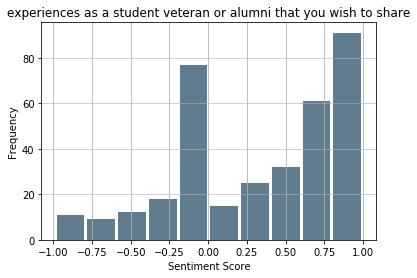

In [5]:
def get_Sentiment(df,name):  
    sid = SentimentIntensityAnalyzer()
    df['sentiment_nltk'] = [sid.polarity_scores(i).get('compound') for i in df[name]]
    lst = []
    for i in range(len(df['sentiment_nltk'])):
        if df['sentiment_nltk'][i] > 0.3:
            lst.append('Positive')
        elif df['sentiment_nltk'][i]< -0.3:
            lst.append('Negative')
        else:
            lst.append('Neutral')
    df['sentiment'] = lst

df_text = df[["End"]].dropna().reset_index()
get_Sentiment(df_text,'End')



data = df_text['sentiment_nltk']

data.plot.hist(grid=True, bins= 10, rwidth=0.9,color='#607c8e')

plt.title('experiences as a student veteran or alumni that you wish to share')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()



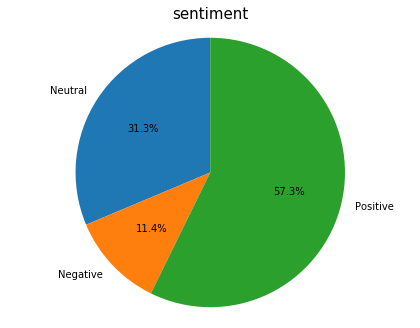

In [6]:
def pie_Percentage_Plot(df,feature,title): 
    lst = list(df[feature])

    dic = {}
    for key in lst:
        dic[key] = dic.get(key, 0) + 1
    labels = list(dic.keys())
    sizes = list(dic.values())
    

    
    fig = plt.figure(figsize = (16,12))
    ax1 = fig.add_subplot(2,2,1)


    ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
            shadow=False, startangle=90)
    ax1.axis('equal') 
    ax1.set_title(title, fontsize = 15)
    


    plt.show()
    
pie_Percentage_Plot(df_text,'sentiment','sentiment')